In [1]:
import sys
sys.path.insert(0, '../')
from NE204_Functions import *

Plots directory already exists


#### 29 is good

In [85]:
uncombined_dir = 'Data/CLLBC/Cs137/'
uncombined_source = 'no-n'
uncombined_data = [uncombined_dir+f for f in os.listdir(uncombined_dir) if f != '.DS_Store' and uncombined_source in f]

file_name = '-'.join(uncombined_data[0].split('/')[-1].split('_')[0].split('-')[:-1])

datas = []
for i, file in enumerate(tqdm(uncombined_data, desc='Combining Files')):
    f = h5py.File(file, 'r')
    data_np = np.array(f['raw_data'])
    time_event, unique_times = np.unique(np.array(f['event_data']['timestamp']), return_index=True)
    
    data_np_crop = data_np[unique_times]
    
    datas.append(data_np_crop)
merge_data = np.concatenate(datas)

fmerged = h5py.File('Data/CLLBC/Combined_Data/{}-{}.h5'.format(file_name, i+1), 'w')
fmerged.create_dataset('raw_data', data=merge_data)

fmerged.close()

Combining Files:   0%|          | 0/10 [00:00<?, ?it/s]

In [24]:
data_test, sat = import_data('/Users/raptor/Research/python3316/Data/Test-CLLBC-1118/CLLBC-Cs137-noterm-10sec_4.h5')
data_test_old, sat = import_data('/Users/raptor/Research/python3316/Data/Test-CLLBC-1118/CLLBC-Cs137-10sec_1.h5')

Checking for Saturation:   0%|          | 0/2150 [00:00<?, ?it/s]

Checking for Saturation:   0%|          | 0/1834 [00:00<?, ?it/s]

In [2]:
#data_old, sat_old = import_data('/Users/raptor/Research/python3316/Data/Test-1103/EJ-301-Test-Cf-10sec_32.h5')
#data, sat = import_data('Data/Test-1104-Cs137-bypass_scope-1200V-far/EJ-301-Test-Cs137-10sec_1.h5')
data_cs, sat_cs = import_data('Data/Test-1104-Cs137-bypass-1200V-close/EJ-301-Test-Cs137-10sec_1.h5')
data_cs_new, sat_cs_new = import_data('Data/Combined_Data/EJ-301-Test-Cs137-3_close.h5')
data_cf, sat_cf = import_data('Data/Test-1104-EJ301-Cf252/EJ-301-Test-Cf252-10sec_2.h5')

Checking for Saturation:   0%|          | 0/4638 [00:00<?, ?it/s]

Checking for Saturation:   0%|          | 0/12561 [00:00<?, ?it/s]

Checking for Saturation:   0%|          | 0/52302 [00:00<?, ?it/s]

In [40]:
data_cs.shape

(4638, 500)

In [41]:
data_cs_new.shape

(12561, 500)

In [71]:
data, sat = import_data('/Users/raptor/Research/python3316/Data/Test-CLLBC-1118/CLLBC-Cf252-25cm-test-10sec_17.h5')

Checking for Saturation:   0%|          | 0/35328 [00:00<?, ?it/s]

In [86]:
data, sat = import_data('Data/CLLBC/Combined_Data/CLLBC-Cs137-25cm-no-n-10.h5')

Checking for Saturation:   0%|          | 0/102655 [00:00<?, ?it/s]

In [81]:
len(data)

193591

In [75]:
len(sat)

2

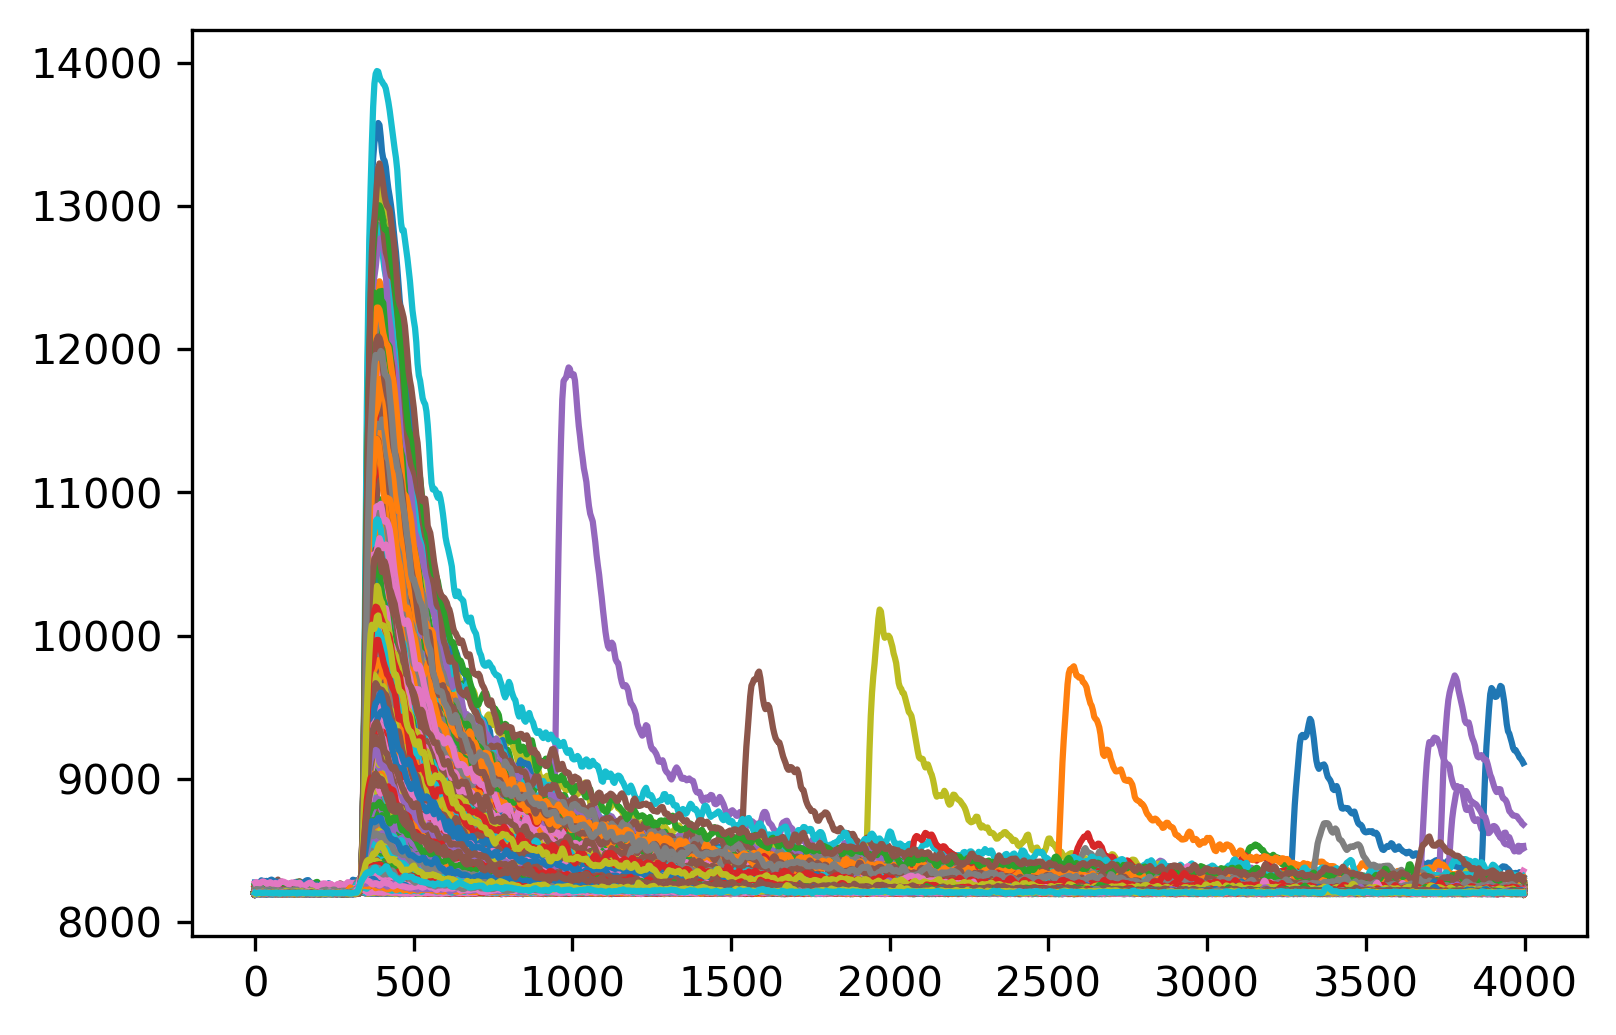

In [82]:
for i in range(5000):
    plt.plot(np.arange(len(data[0]))*4, data[i])
#plt.xlim(300, 400)
plt.show()

In [69]:
test = h5py.File('/Users/raptor/Research/python3316/Data/Test-CLLBC-1118/CLLBC-Cf252-25cm-test-10sec_17.h5')

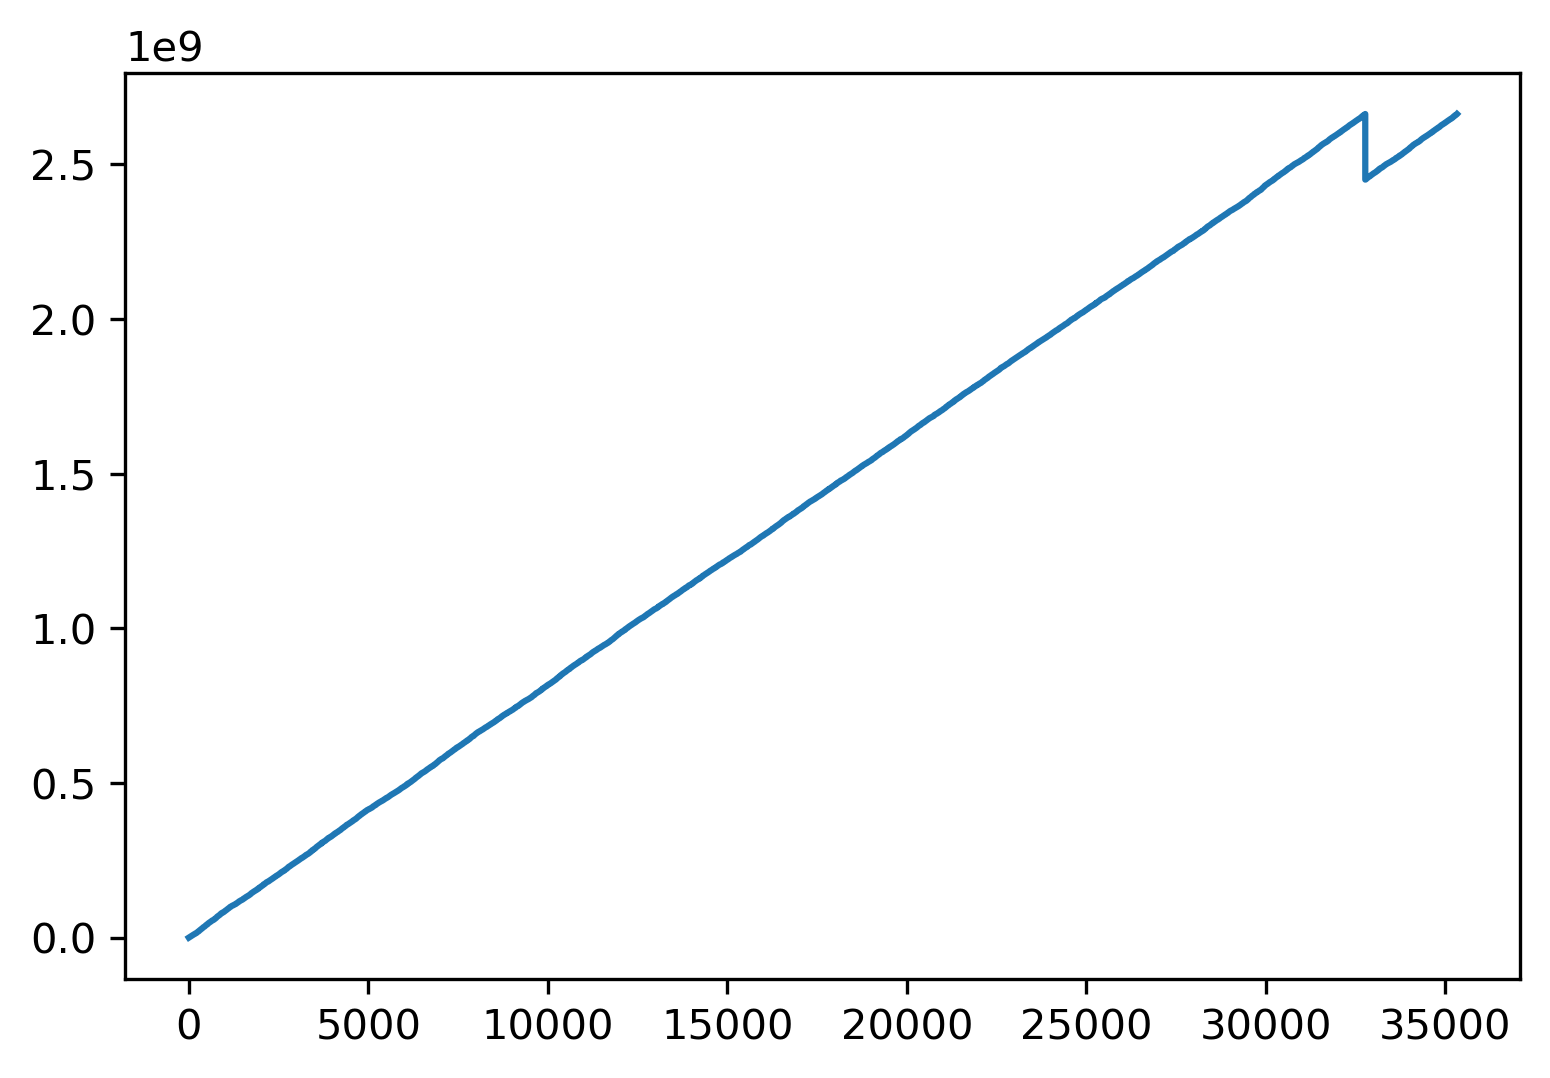

In [70]:
plt.plot(test['event_data']['timestamp'])
#plt.xlim(0,1500)

In [46]:
1800*6

10800

In [87]:
temp_enes = []

for i in range(len(data)):
    #if np.max(data[i]) <= 13000:
    temp_enes.append(np.max(data[i]))
temp_enes = np.array(temp_enes)

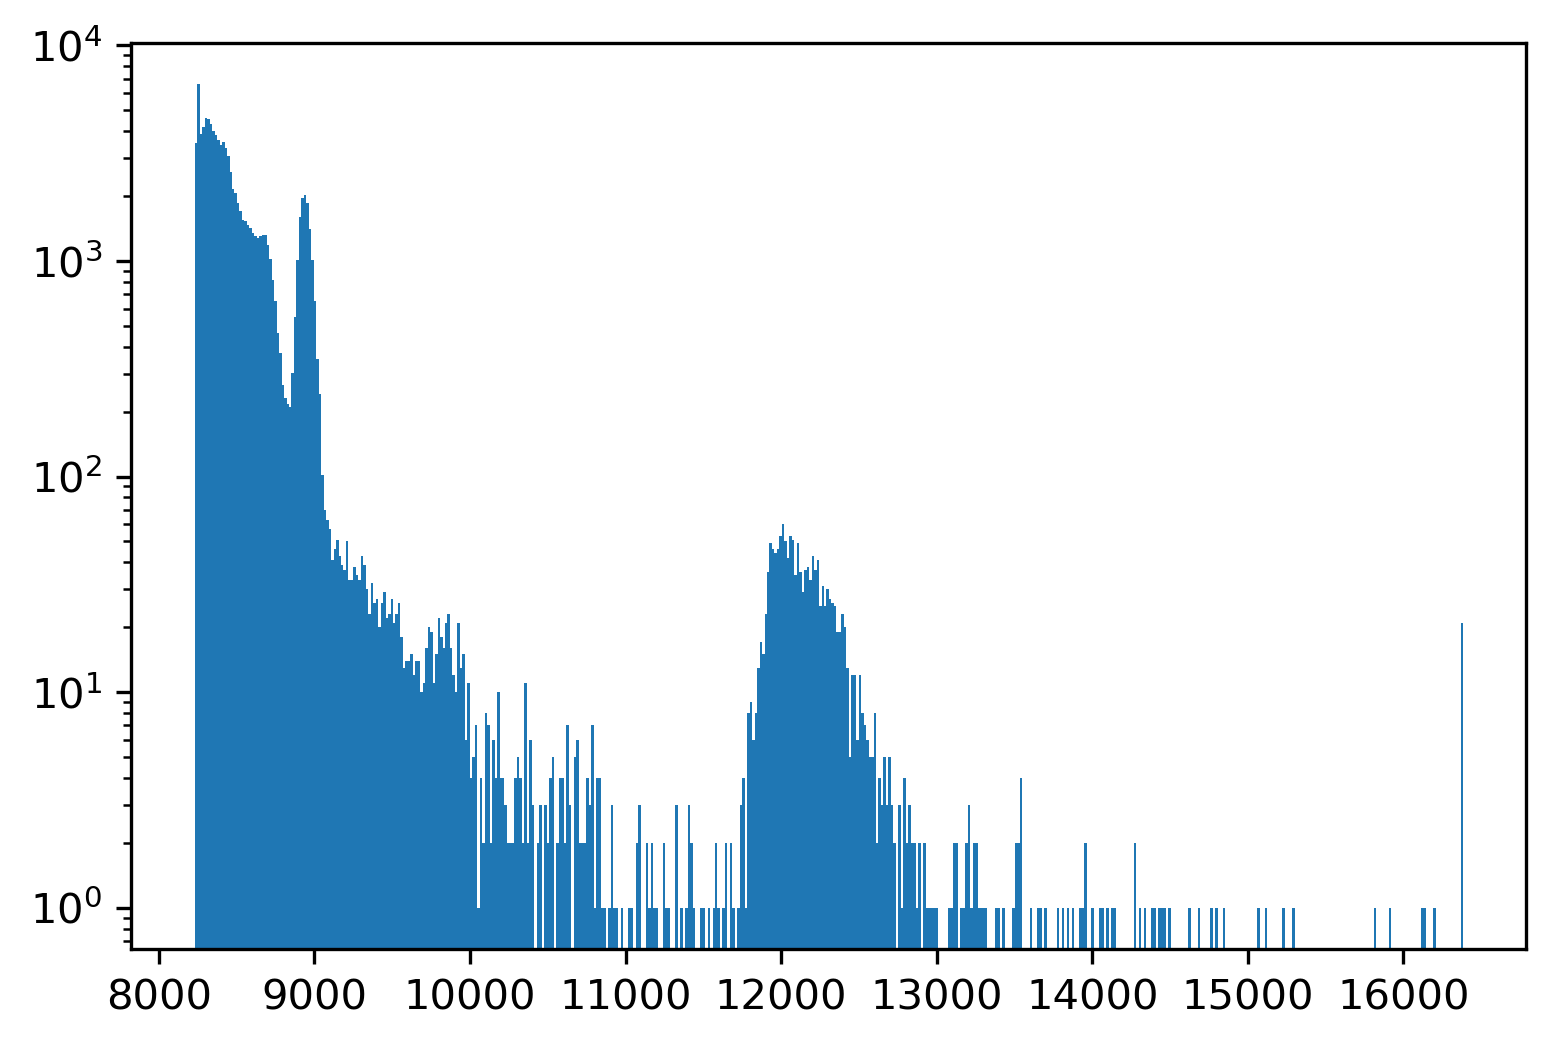

In [88]:
plt.hist(temp_enes, bins=2**9)
plt.semilogy()
plt.show()

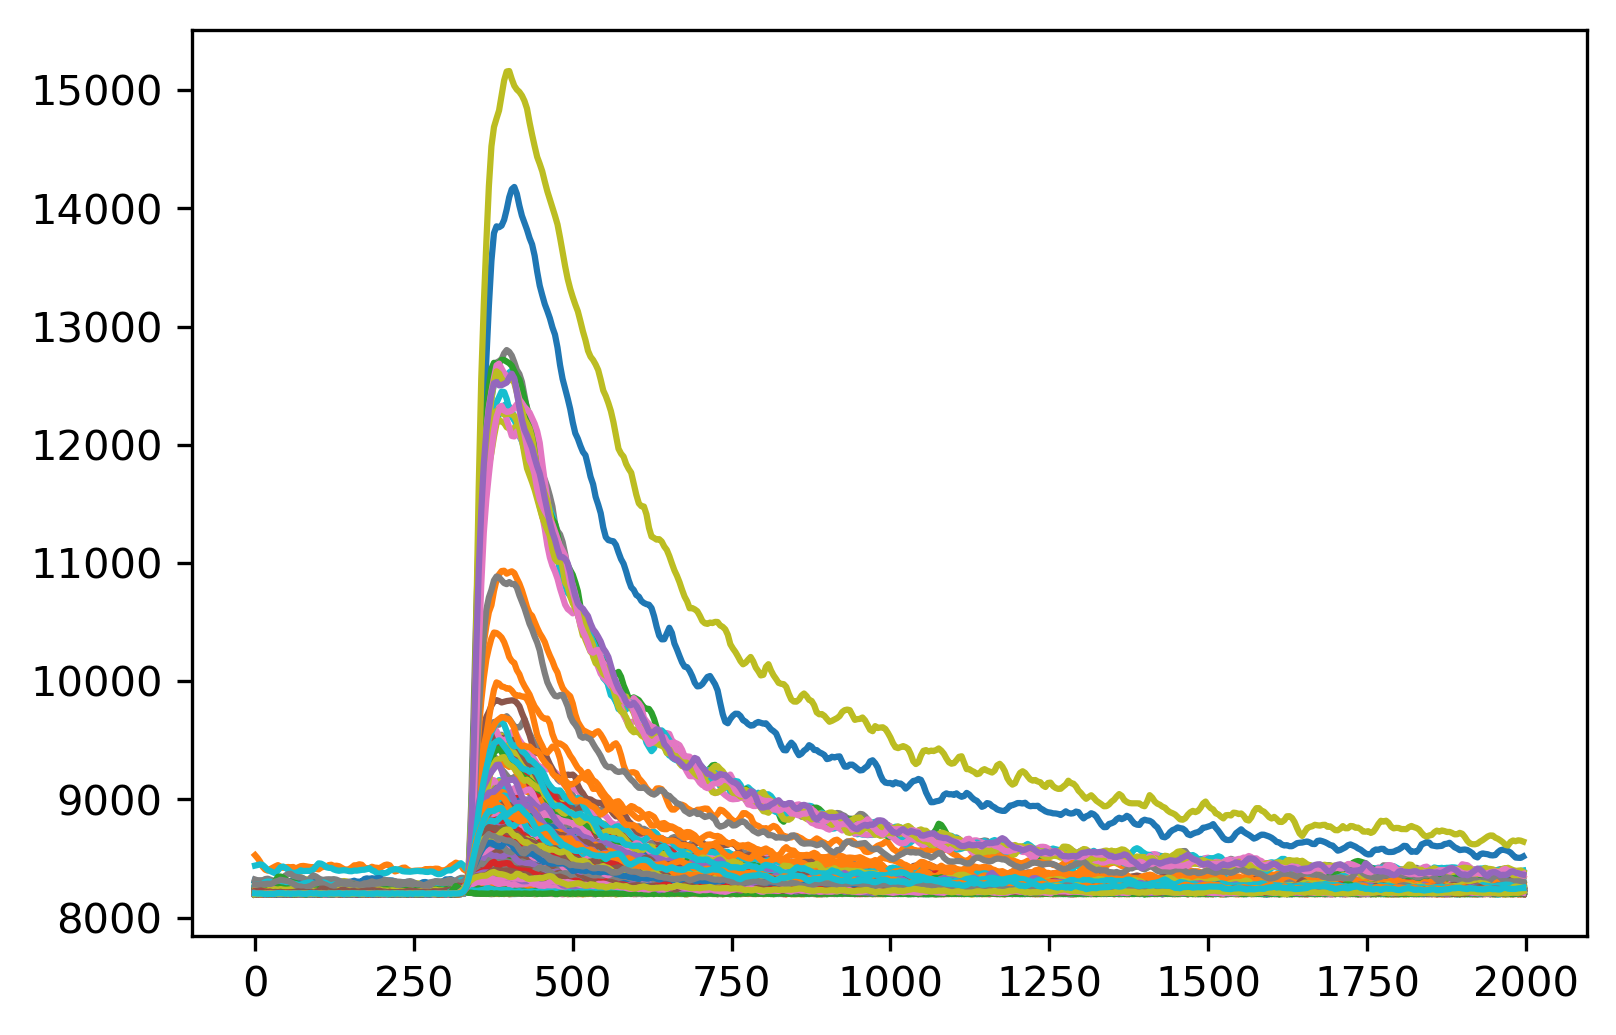

In [29]:
for i in range(1000):
    plt.plot(np.arange(len(data_test[0]))*4, data_test[i])
#plt.xlim(300, 400)
plt.show()

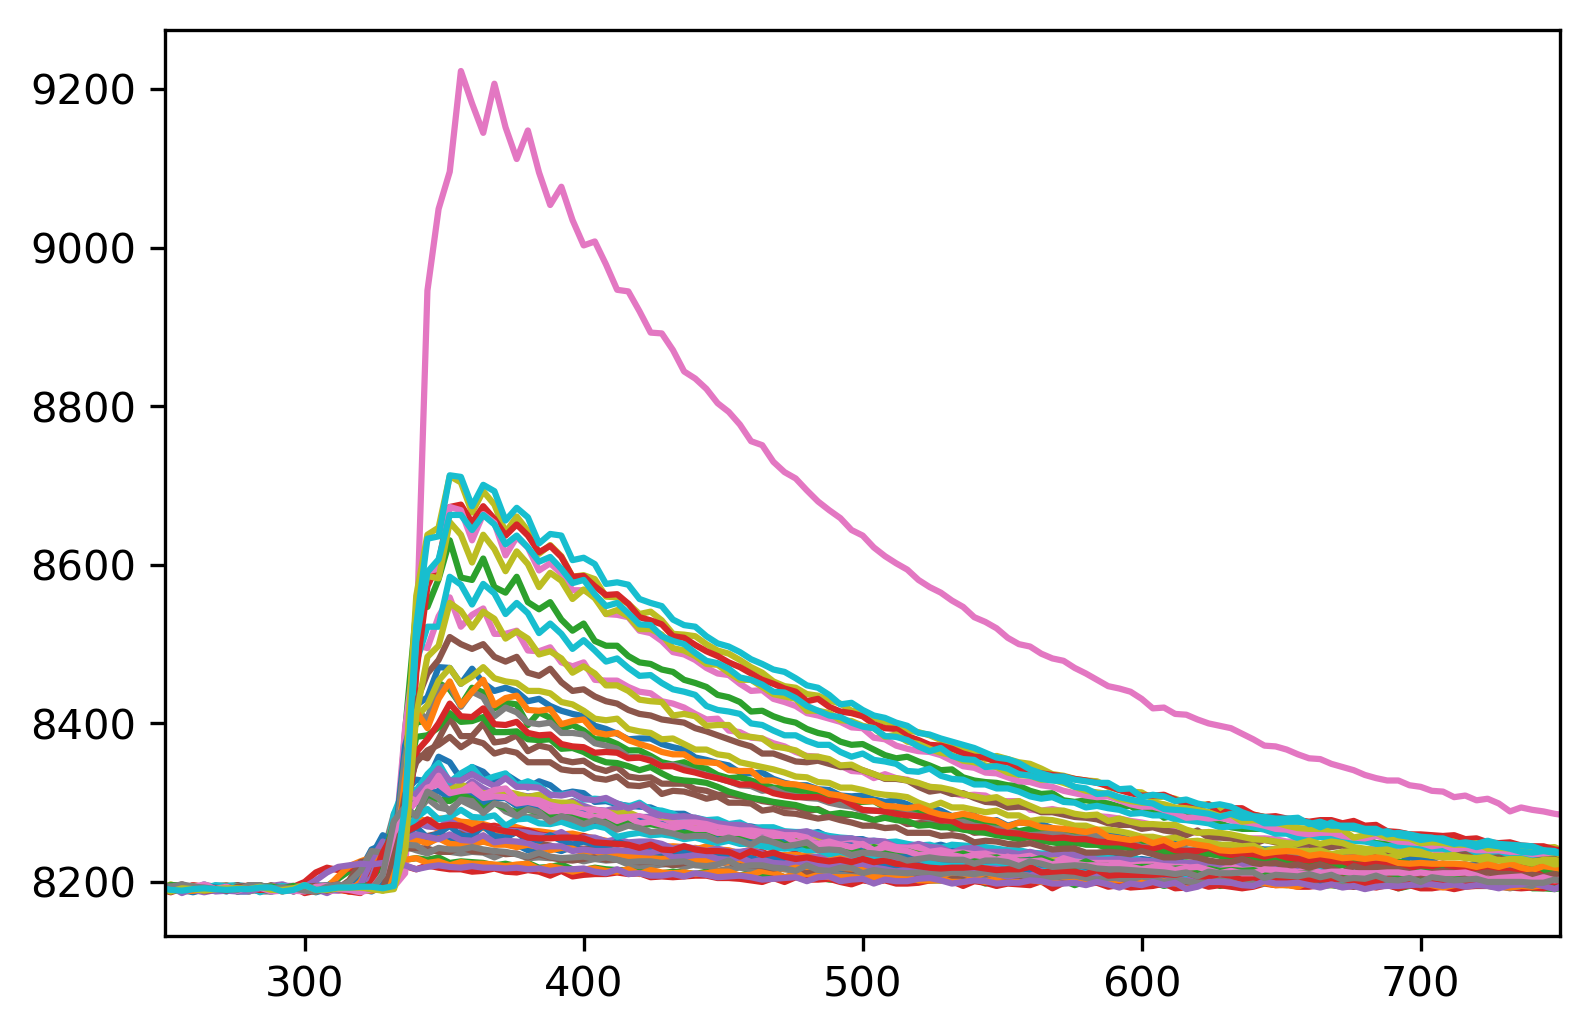

In [6]:
for i in range(50):
    plt.plot(np.arange(len(data_cs[0]))*4, data_cs[i])
plt.xlim(250, 750)
plt.show()

74


(0.0, 0.7)

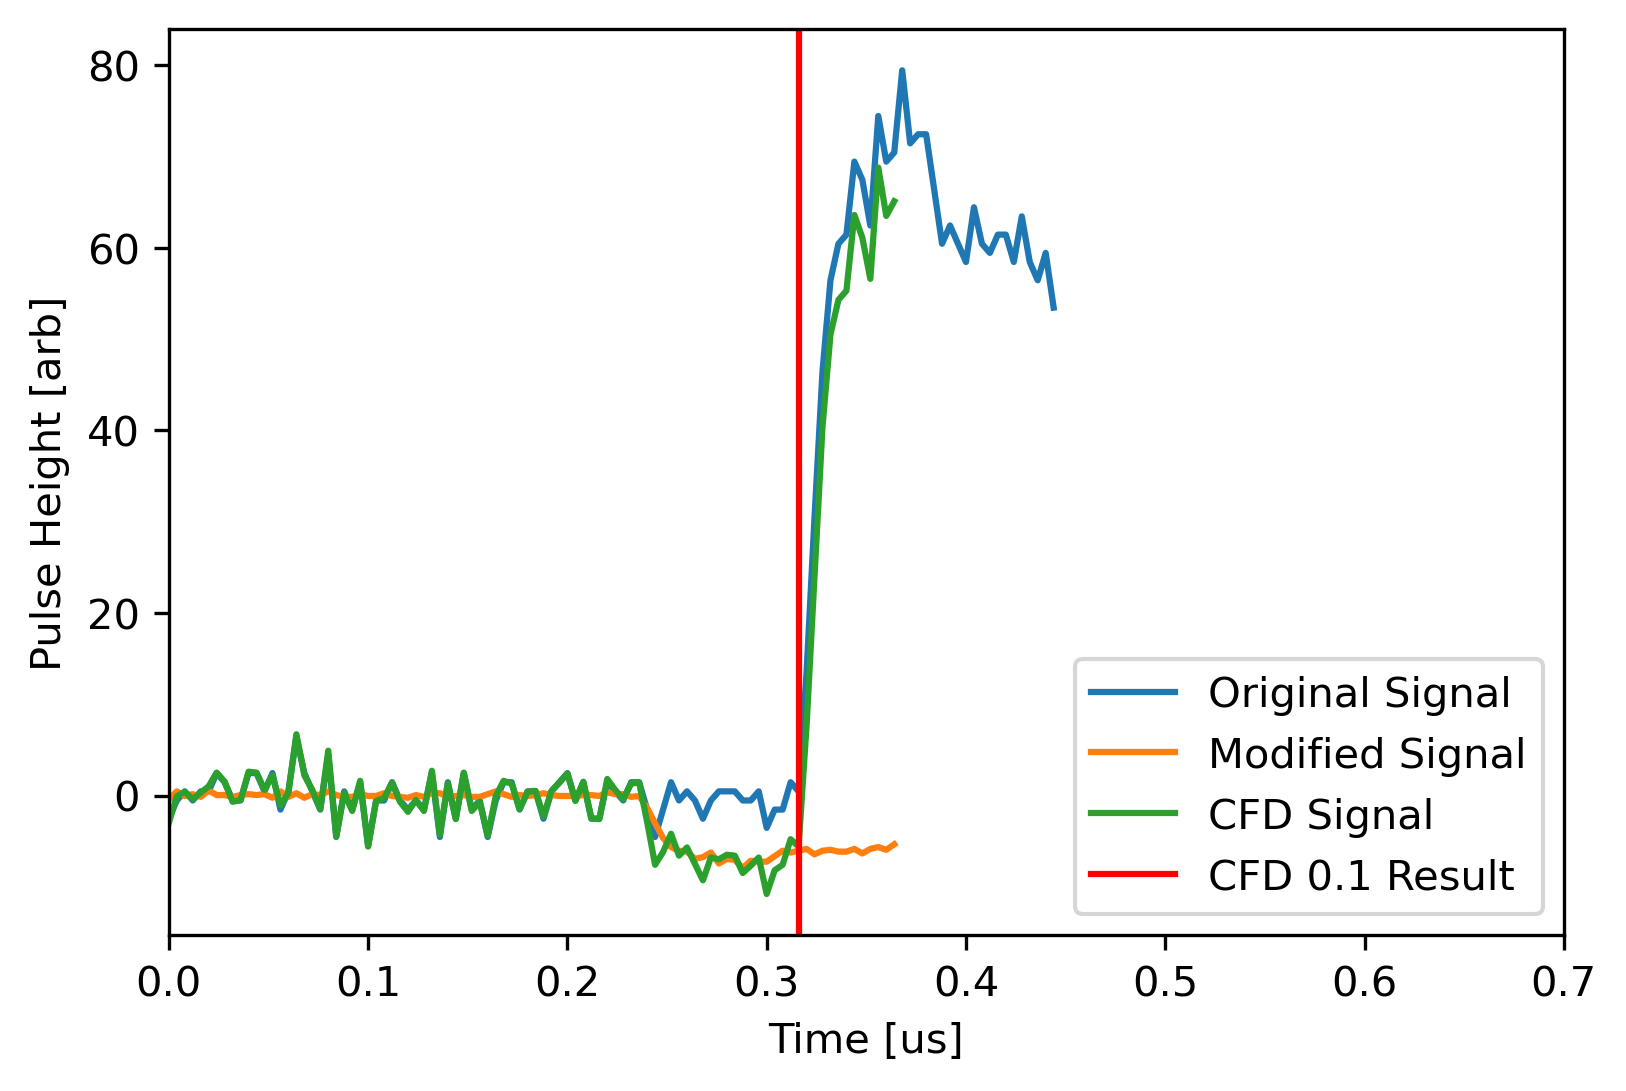

In [13]:
CFD(data_cf[120], 0.1, samp_size=50, shift=20, pf=True)
print(CFD(data_cf[100], 0.1, samp_size=20, shift=50))
plt.xlim(0,0.7)

In [52]:
def quick_psd(data, threshold, min_, max_):
    data_r = reset_zero(data[:max_], samp_size=5)
    
    total = np.sum(data_r[min_:])
    
    tail = np.sum(data_r[min_+threshold:])
    
    return tail, total

In [15]:
max_ = 300
totals, tails = [], []
rises = []
inds = []
pileup = np.argwhere(np.argmax(data_cf, axis=1)>100)[:,0]
for i in tqdm(range(len(data_cf))):
    if i not in pileup:
        inds.append(i)
        min_ = CFD(data_cf[i][:120], 0.1, samp_size=50, shift=20)
        rises.append(min_)
        temp = quick_psd(data_cf[i], 16, min_-3, max_)
        tails.append(temp[0])
        totals.append(temp[1])
totals = np.array(totals)
tails = np.array(tails)
rises = np.array(rises)
inds = np.array(inds)

  0%|          | 0/52302 [00:00<?, ?it/s]

In [105]:
min_ = CFD(data_cf[0][:120], 0.1, samp_size=50, shift=20)
test = quick_psd(data_cf[0], 16, min_-3, 300)

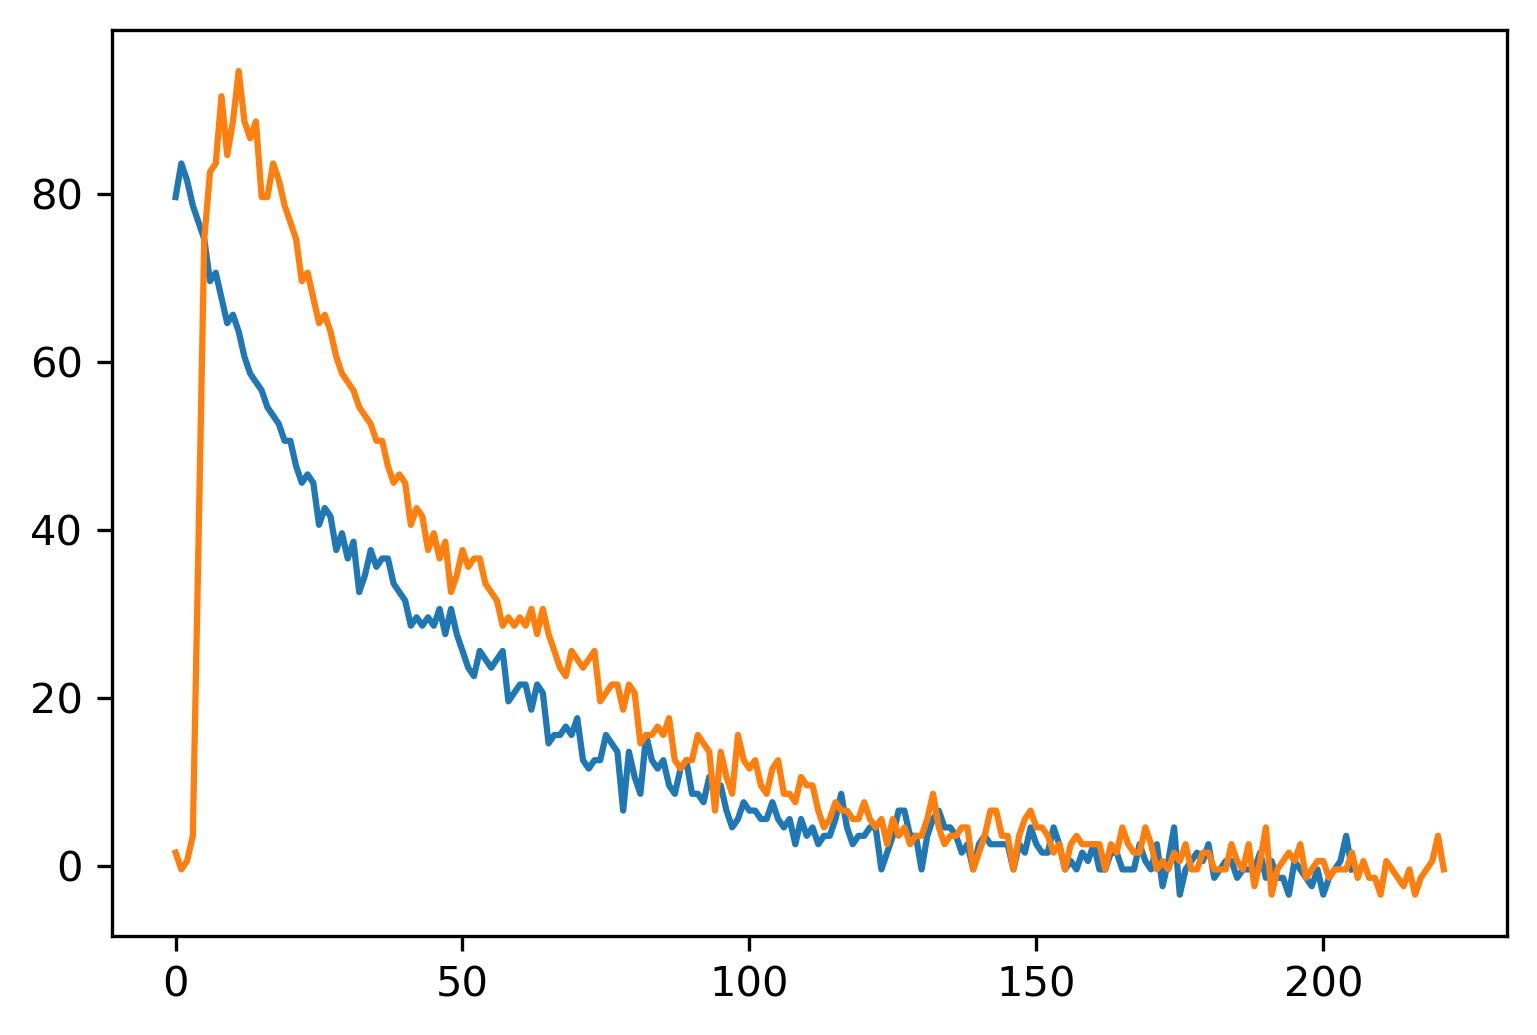

In [106]:
plt.plot(test[0])
plt.plot(test[1])

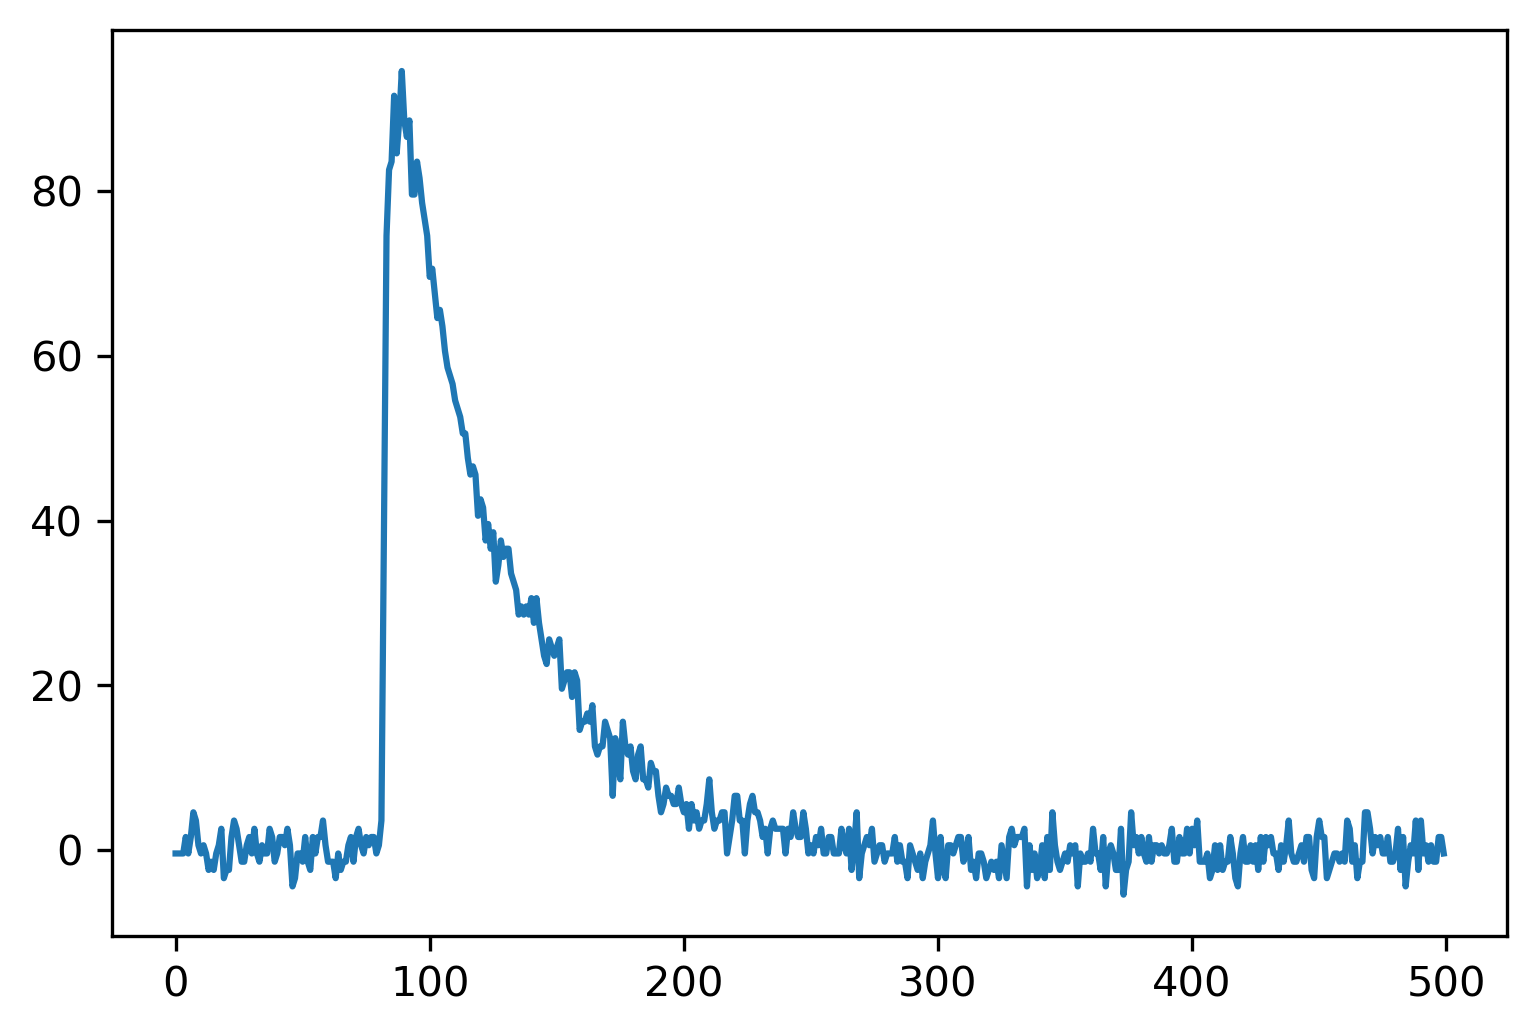

In [103]:
plt.plot(reset_zero(data_cf[0], samp_size=5))

In [89]:
totals

array([ 113.2, 8123.2,   67. , ...,  307.8,  335. ,  163. ])

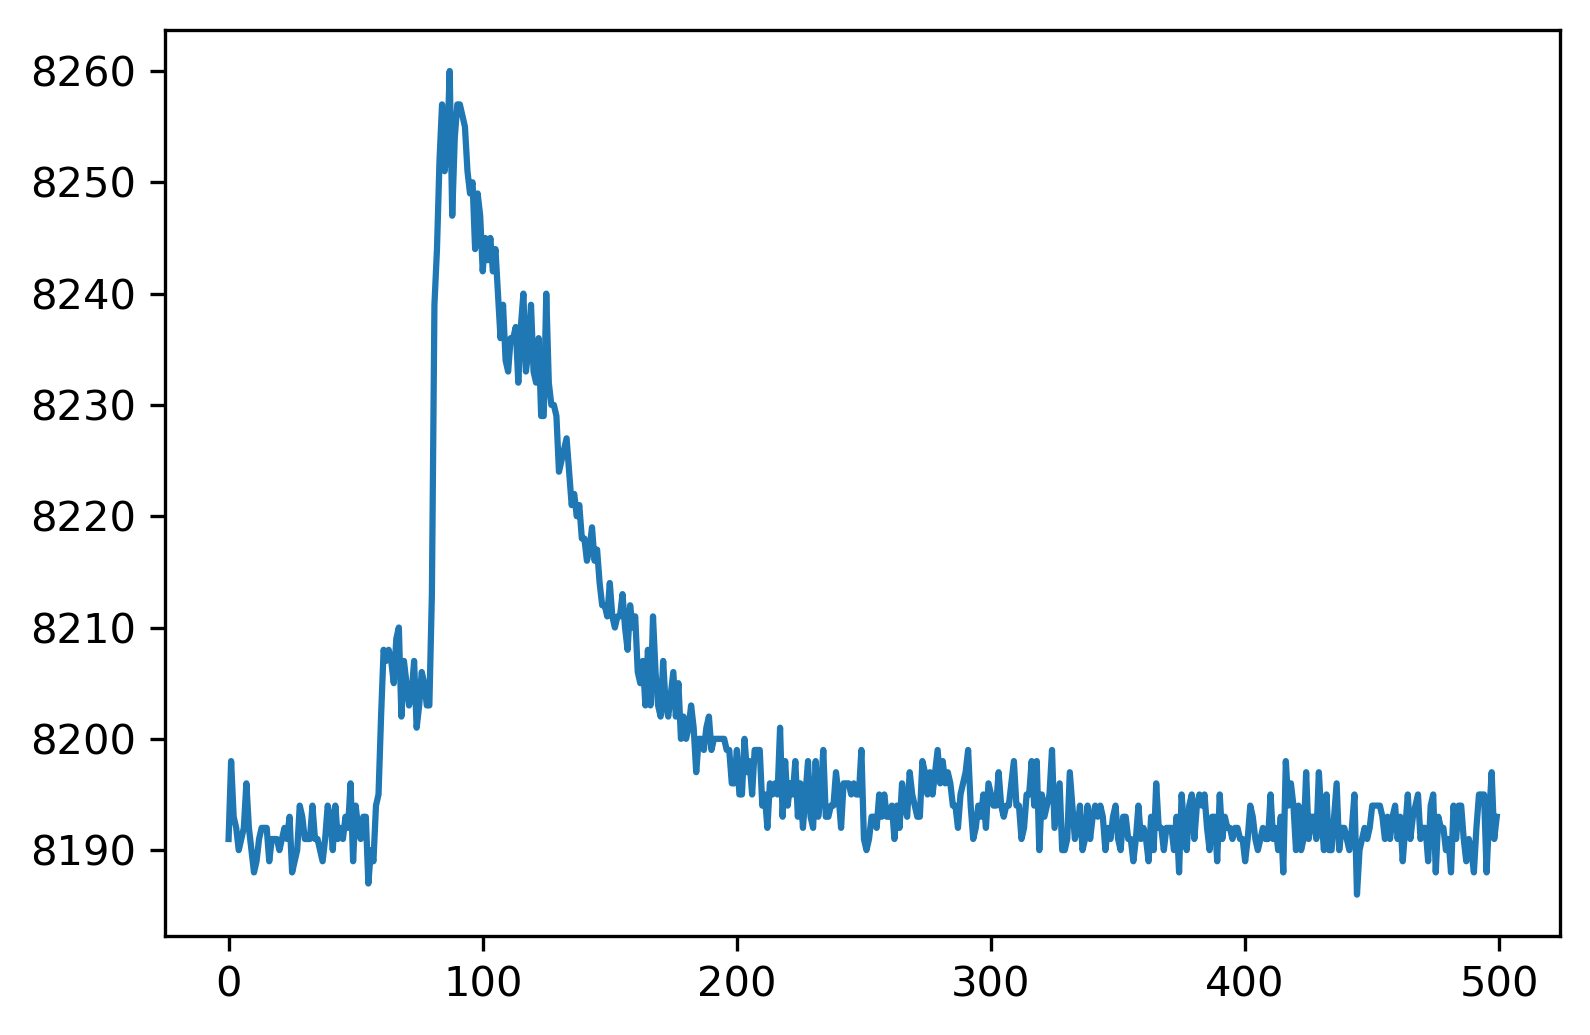

In [60]:
plt.plot(data_cf[np.argmin(rises)])

In [66]:
bad_maybe[0][:,0]

array([  361,  1111,  1425,  1801,  2839,  3770,  4327,  5929,  6203,
        6374,  6529,  6827,  7378,  7548,  8282,  9156,  9323,  9540,
        9820,  9847, 10118, 10616, 10632, 10876, 11886, 12201, 14473,
       14513, 14762, 15060, 15722, 15737, 15939, 16442, 16805, 17288,
       17315, 18407, 18597, 18740, 19444, 21167, 21991, 22649, 22951,
       23152, 23922, 24845, 25058, 26000, 26819, 26949, 27159, 27404,
       28455, 29024, 29304, 29601, 29727, 30297, 31178, 31567, 31887,
       32207, 32758, 34541, 35091, 35131, 36197, 36657, 36697, 37175,
       37902, 38277, 38335, 38510, 38681, 40373, 40441, 40587, 40611,
       41057, 41805, 44057, 44716, 44806, 44831, 46146, 46270, 47168,
       47822, 48587, 48590, 49440, 49564, 50462, 51116, 51881, 51884])

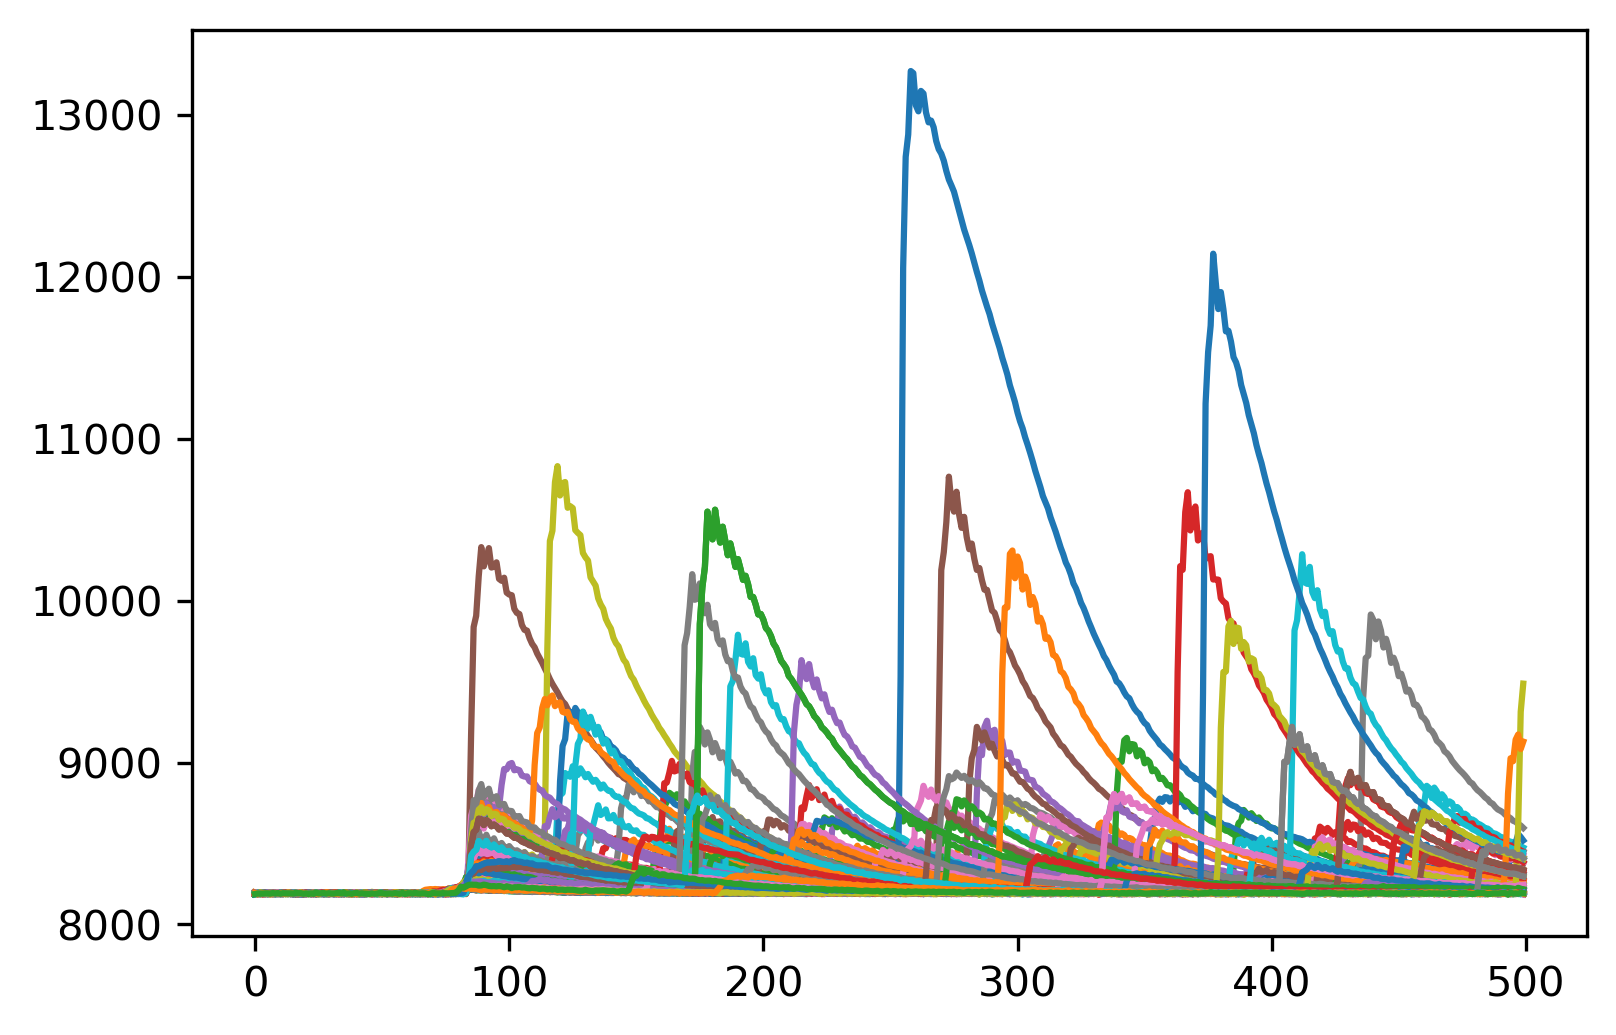

In [81]:
test = np.argwhere(np.argmax(data_cf, axis=1)>100)[:,0]

for t in test:
    plt.plot(data_cf[t])

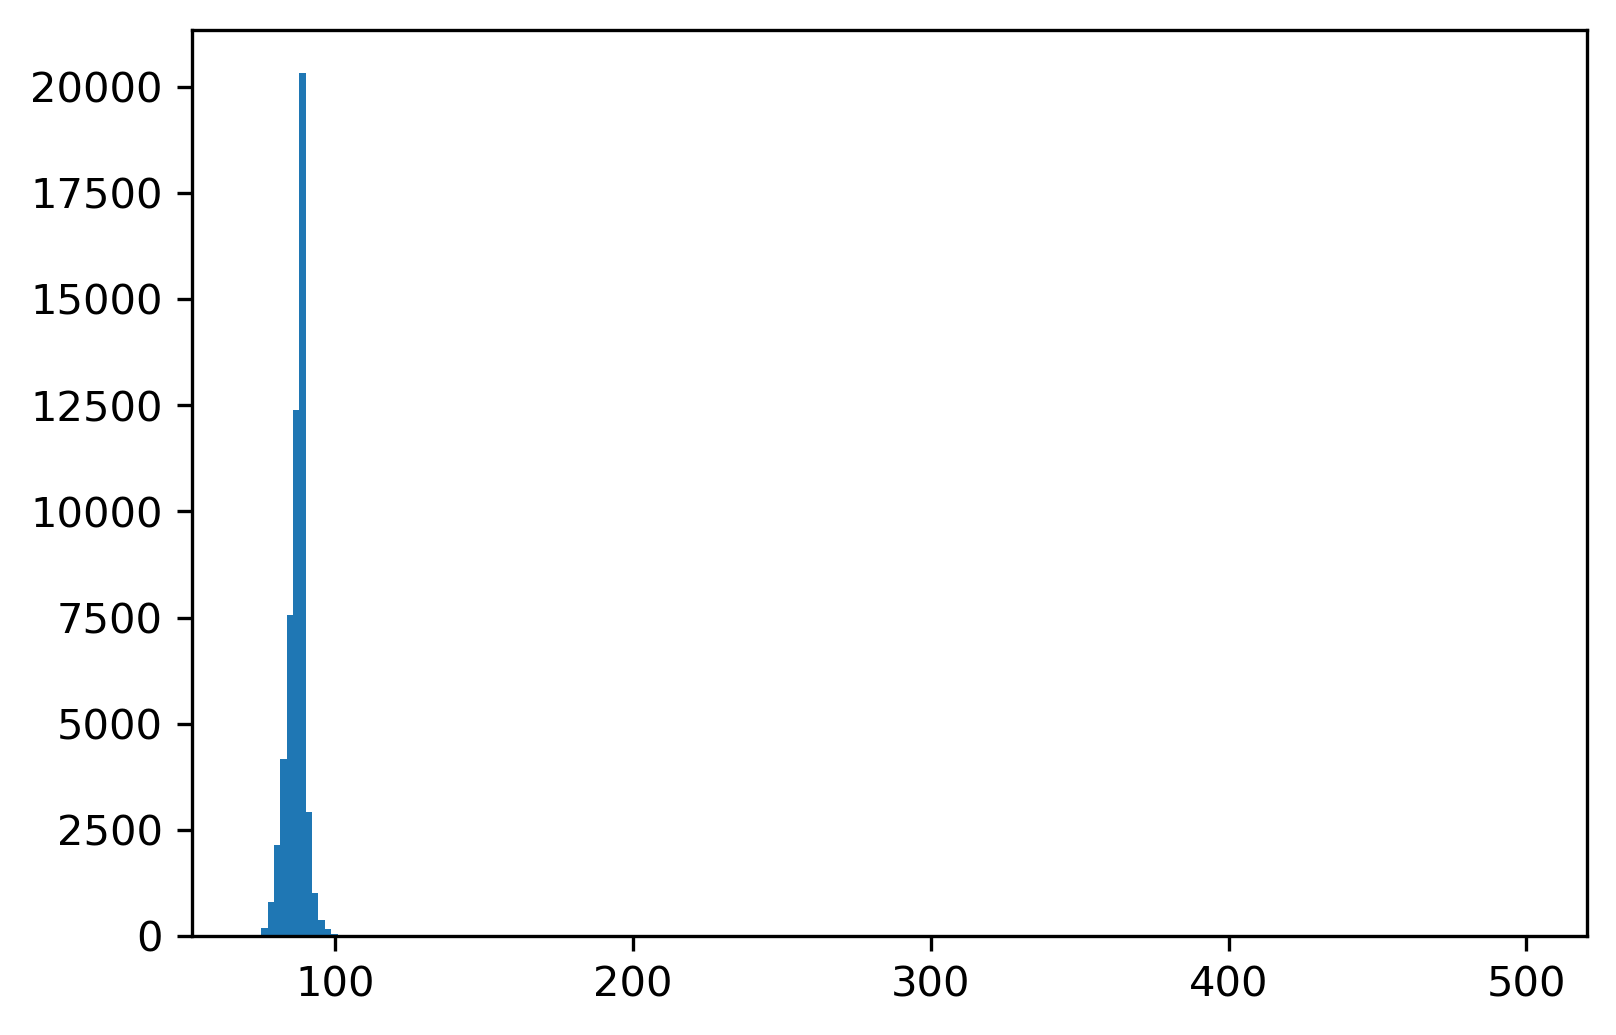

In [79]:
plt.hist(np.argmax(data_cf, axis=1), bins=200)
plt.show()

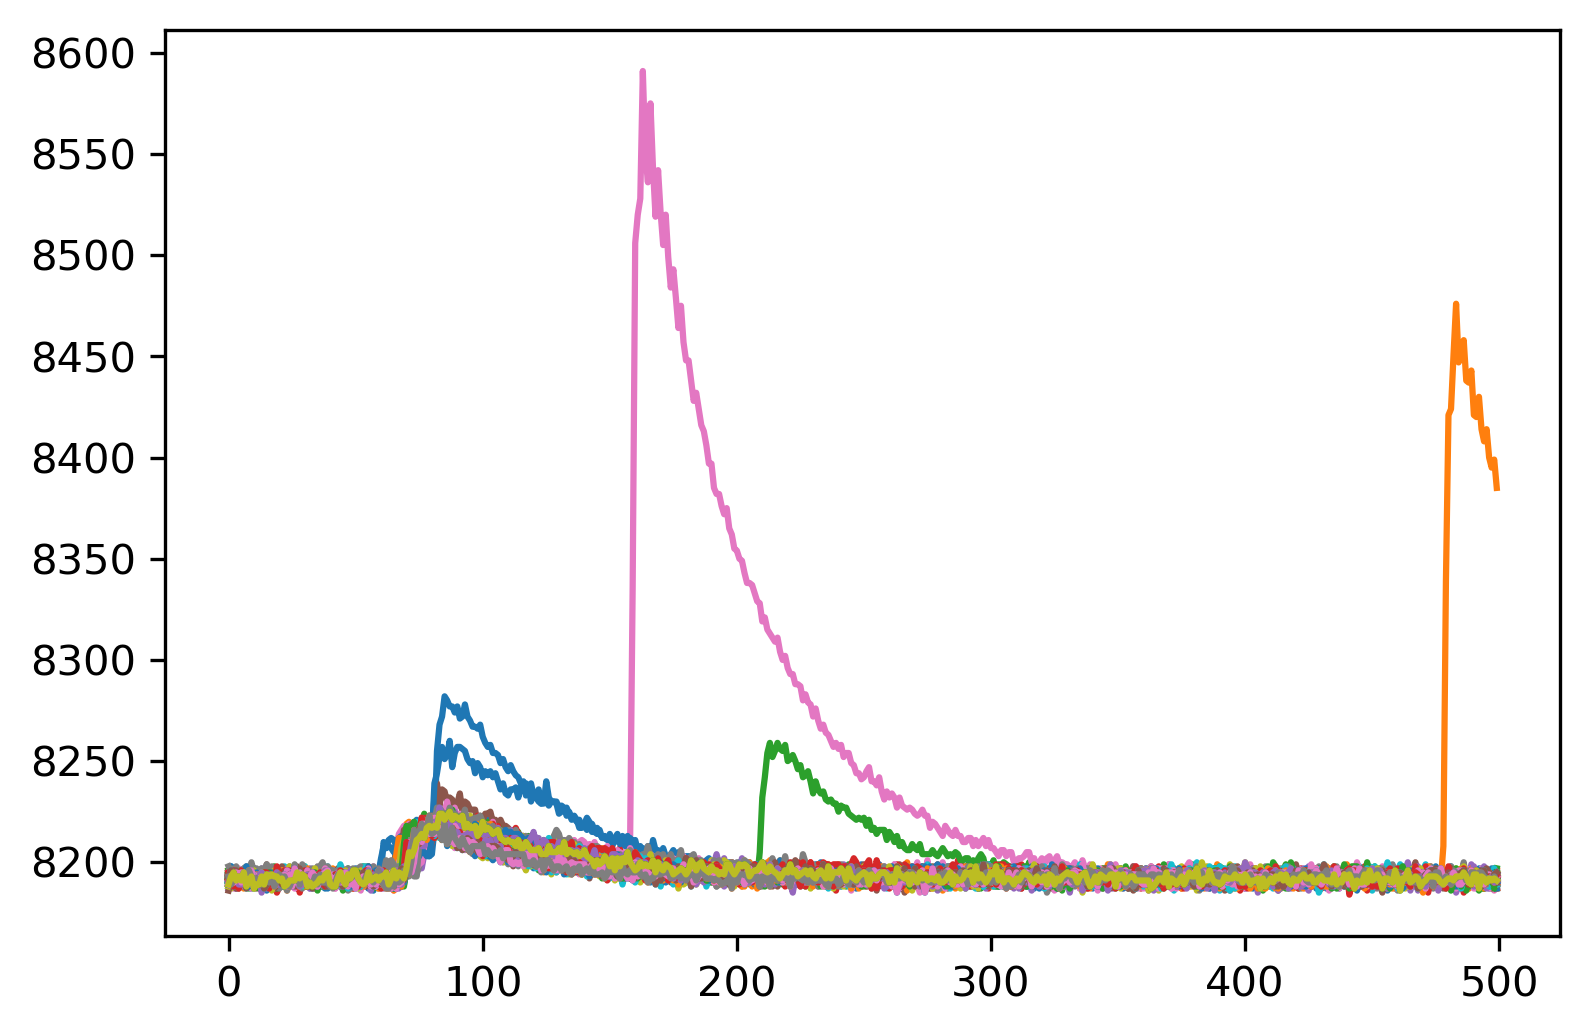

In [72]:
bad_maybe = np.argwhere(rises<70)[:,0]

for bm in bad_maybe:
    plt.plot(data_cf[bm])

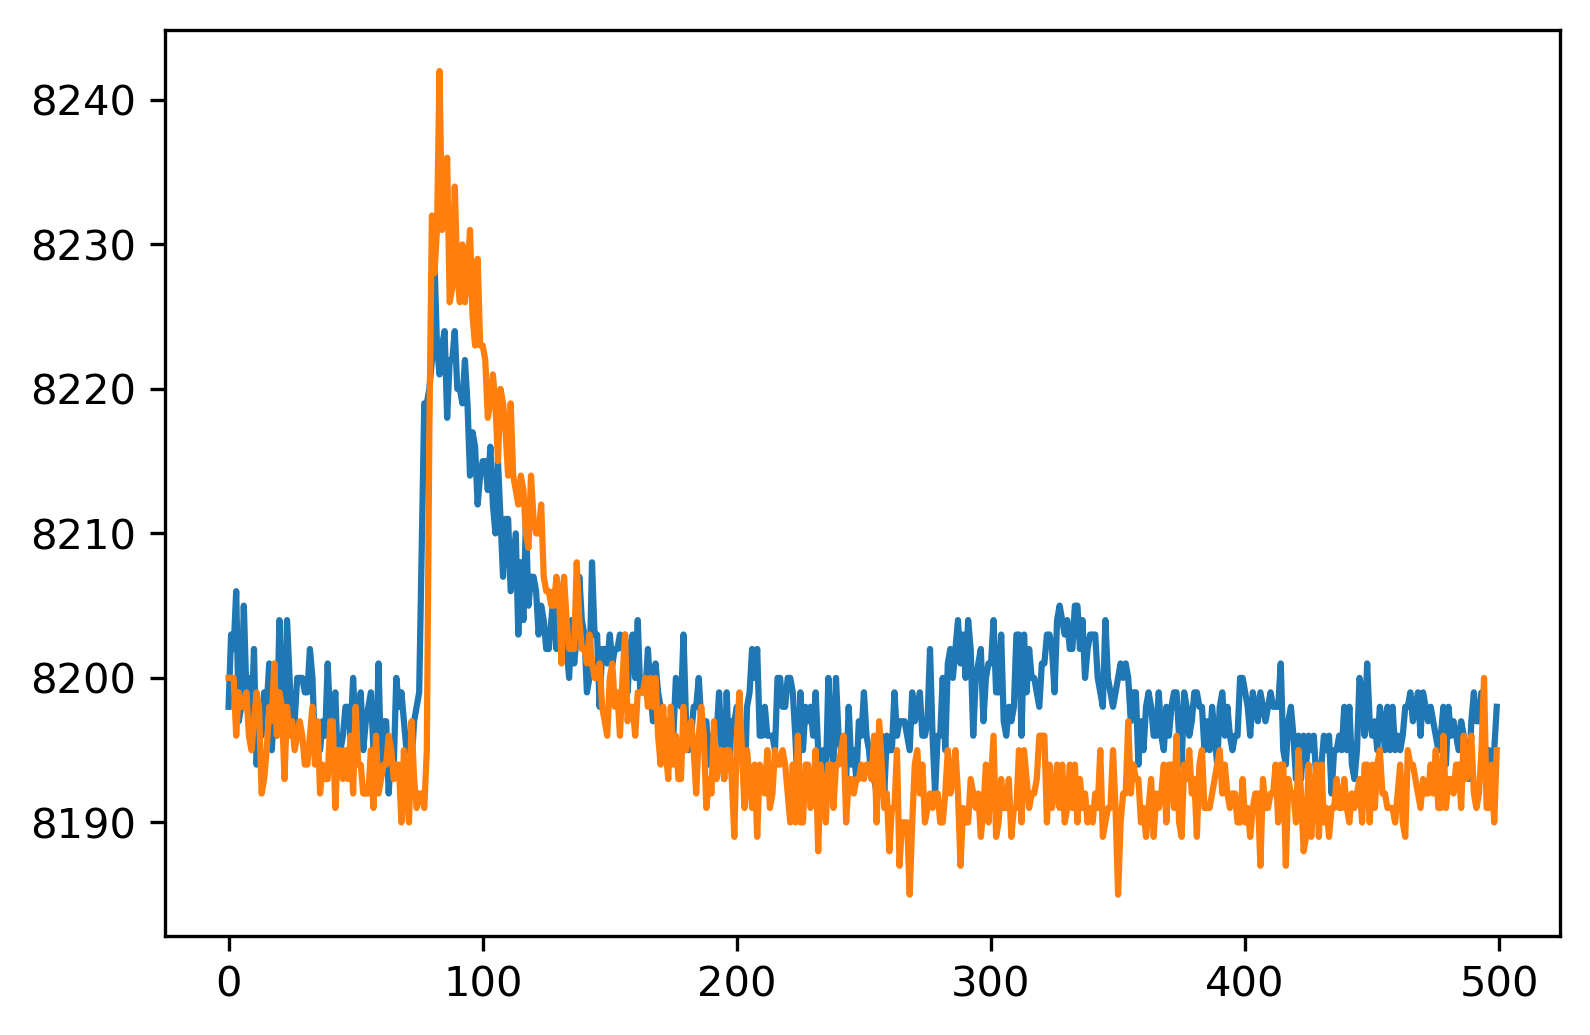

In [119]:
neg = inds[np.argwhere(tails<0)[:,0]]

for n in neg:
    plt.plot(data_cf[n])

In [125]:
np.arange(1, 20)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [21]:
max_ = 300
pileup = np.argwhere(np.argmax(data_cf, axis=1)>100)[:,0]
t_tot, t_tail = [], []
thresh = np.arange(9, 76)
for thr in tqdm(thresh):
    totals, tails = [], []
    rises = []
    inds = []
    for i in tqdm(range(len(data_cf)), leave=False):
        if i not in pileup:
            inds.append(i)
            min_ = CFD(data_cf[i][:120], 0.1, samp_size=50, shift=20)
            rises.append(min_)
            temp = quick_psd(data_cf[i], thr, min_-3, max_)
            tails.append(temp[0])
            totals.append(temp[1])
    totals = np.array(totals)
    tails = np.array(tails)
    rises = np.array(rises)
    inds = np.array(inds)
    
    t_tot.append(totals)
    t_tail.append(tails)
    
t_tot = np.array(t_tot)
t_tail = np.array(t_tail)

  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

  0%|          | 0/52302 [00:00<?, ?it/s]

In [17]:
for i in tqdm(range(len(t_tot))): #len(t_tot)):
    plt.hist(t_tail[i]/t_tot[i], bins=np.linspace(0.1, 1, 500), 
             label='Threshold {}'.format(thresh[i]))
    #plt.legend(fontsize=5, ncol=2)
    plt.legend()
    plt.xlabel('Tail/Total Ratio')
    plt.ylabel('Counts')
    plt.savefig('Plots/TtT-Hists-NoInterp/TtT-{}Thresh.png'.format(thresh[i]), 
                dpi=300, facecolor='white', bbox_inches='tight')
    plt.close()

  0%|          | 0/75 [00:00<?, ?it/s]

In [32]:
np.argwhere(thresh==22)[:,0][0]

13

(0.0, 120000.0)

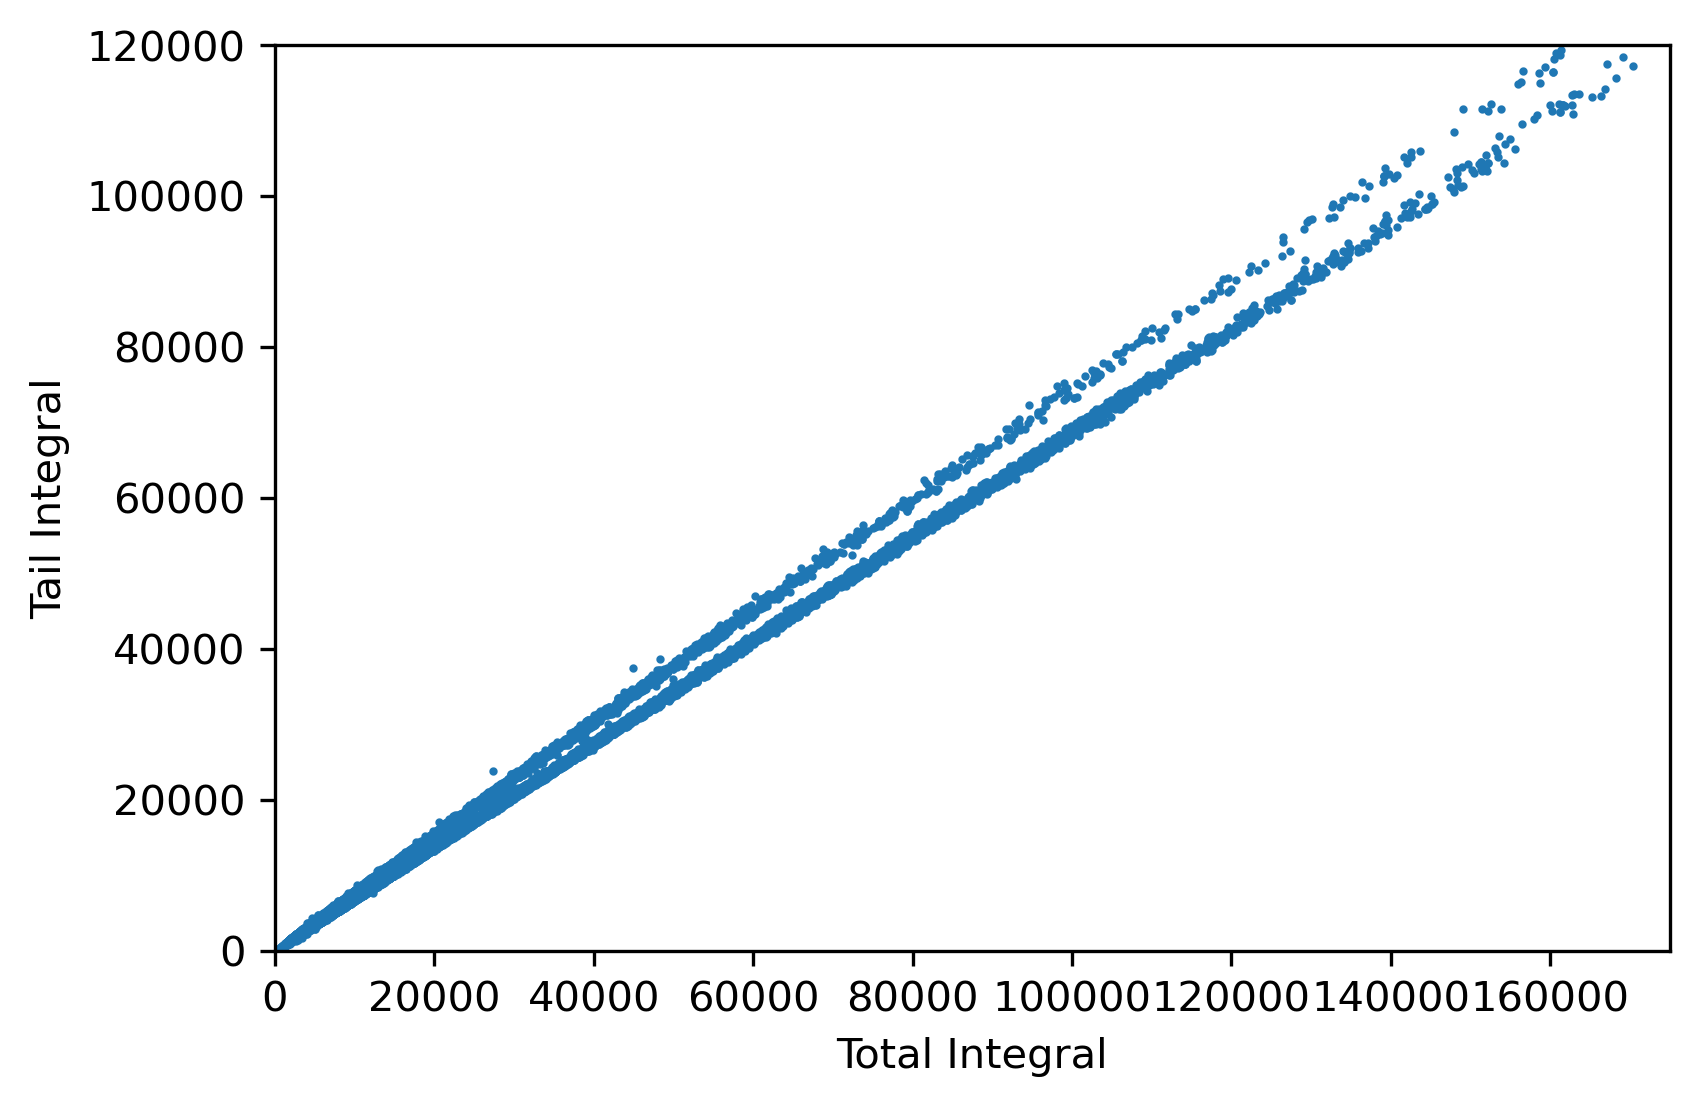

In [168]:
plt.scatter(t_tot[np.argwhere(thresh==21)[:,0][0]], t_tail[np.argwhere(thresh==21)[:,0][0]], s=1)
plt.xlabel('Total Integral')
plt.ylabel('Tail Integral')
plt.xlim(0, 1.75e5)
plt.ylim(0, 1.2e5)

In [106]:
def gauss(x, H, A, x0, sigma):
    # Gaussian signal shape
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def double_gauss(x, A1, mu1, sig1, A2, mu2, sig2):
    # Assuming no background
    return gauss(x, 0, A1, mu1, sig1) + gauss(x, 0, A2, mu2, sig2)

In [162]:
curve_fit

<function scipy.optimize.minpack.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)>

In [177]:
binsss[np.argmax(counts)]

0.7431438127090301

In [191]:
binsss[np.argmax(counts)]

0.7407035175879397

In [197]:
test_fit[0][2]

-0.04648674905444311

In [193]:
test_fit[0][3]

3787.0790698899095

array([22])

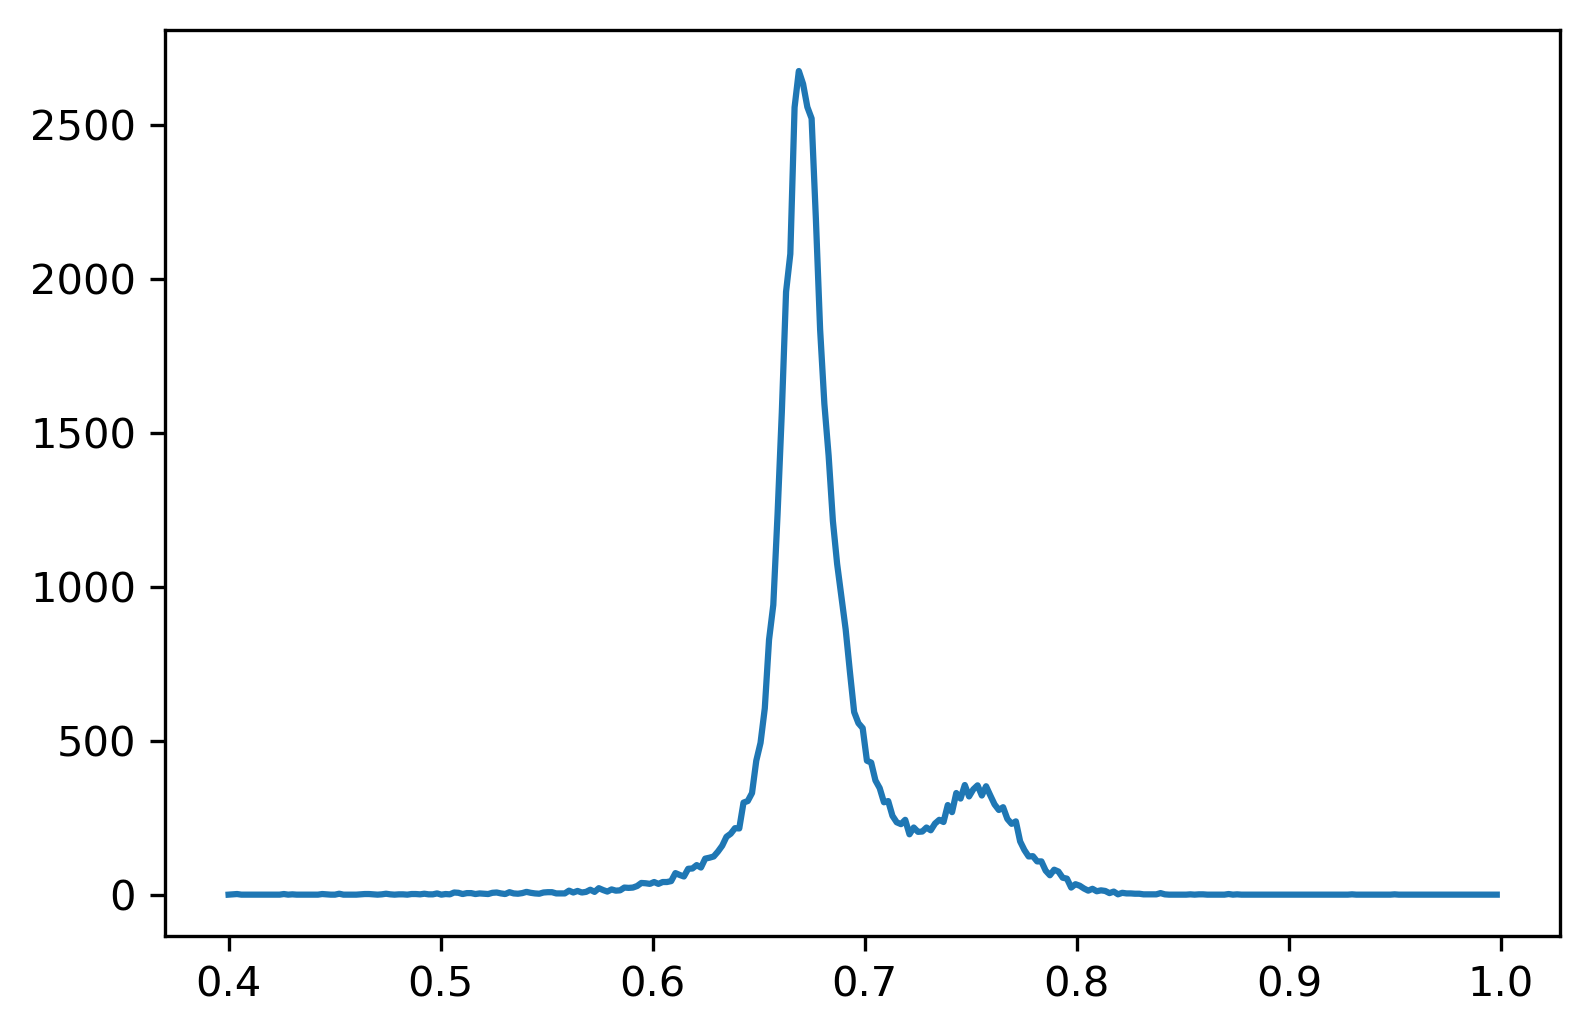

In [34]:
counts, binsss, p = plt.hist(t_tail[np.argwhere(thresh==22)[:,0][0]]/t_tot[np.argwhere(thresh==22)[:,0][0]], 
                             bins=np.linspace(0.4, 1, 300))
plt.close()
#test_fit = curve_fit(double_gauss, binsss[:-1], counts)#, 
                     #p0=[max(counts), binsss[np.argmax(counts)], ])

plt.plot(binsss[:-1], counts)
#plt.plot(binsss[:-1], double_gauss(binsss[:-1], *test_fit[0]))
# plt.plot(binsss[:-1], double_gauss(binsss[:-1], 
#                                    max(counts), binsss[np.argmax(counts)], 0.008,
#                                   800, 0.84, 0.015))

In [49]:
from scipy.signal import find_peaks

In [113]:
def gauss_new(x, A, x0, sigma):
    # Gaussian signal shape
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

In [151]:
thresh[2:]

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75])

In [163]:
foms = []
for tt, thresh_test in enumerate(tqdm(thresh[2:])):
    counts, binsss, p = plt.hist(t_tail[np.argwhere(thresh==thresh_test)[:,0][0]]/t_tot[np.argwhere(thresh==thresh_test)[:,0][0]], 
                             bins=np.linspace(0, 1, 500))
    plt.close()
    
    dh = savgol_filter(counts, 3, 0)
    peaks, proms = find_peaks(dh, prominence=2)
    first = peaks[np.argwhere(proms['prominences']==np.sort(proms['prominences'])[-1])[0,0]]
    second = peaks[np.argwhere(proms['prominences']==np.sort(proms['prominences'])[-2])[0,0]]

    dip = np.argmin(dh[first:second])+first

    fit_gamma, cov_g = curve_fit(gauss_new, binsss[:dip], dh[:dip])
    fit_neutron, cov_n = curve_fit(gauss_new, binsss[dip:-1], dh[dip:])

    fom = np.abs(fit_gamma[1]-fit_neutron[1])/(2*np.sqrt(np.log(2)*2)*(np.abs(fit_gamma[2])+np.abs(fit_neutron[2])))
    
    foms.append(fom)
foms = np.array(foms)

  0%|          | 0/65 [00:00<?, ?it/s]

In [166]:
thresh[2:][np.argmax(foms)]

21

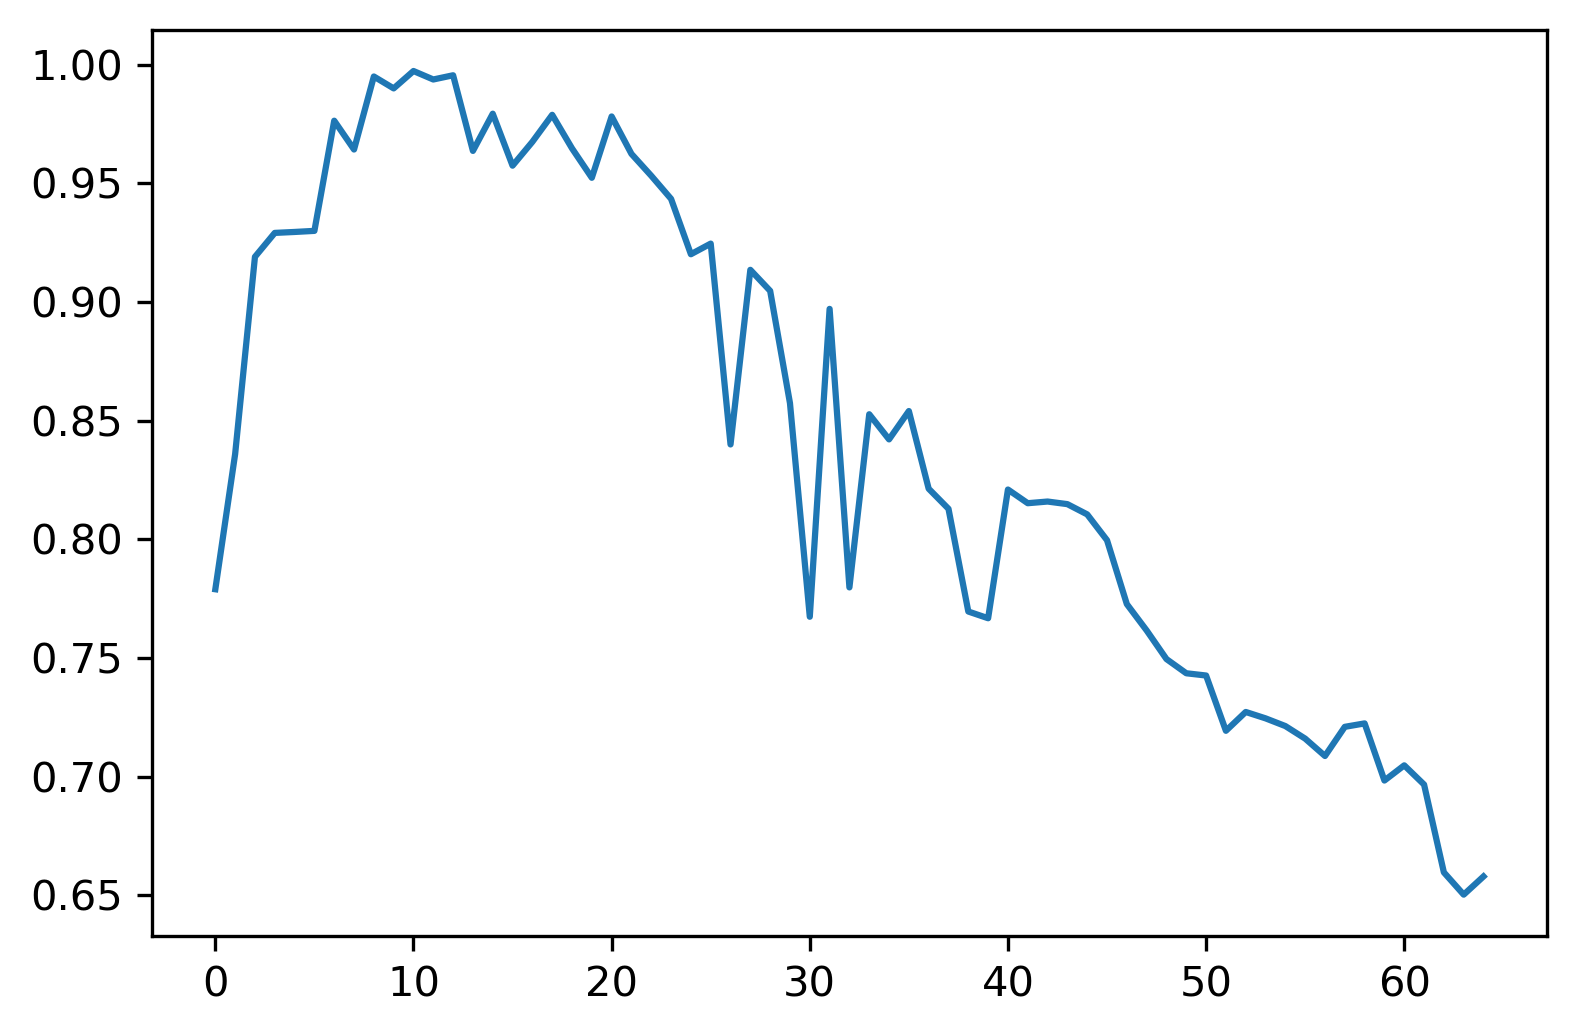

In [164]:
plt.plot(foms)

Calculated FOM: 0.8124019066203023


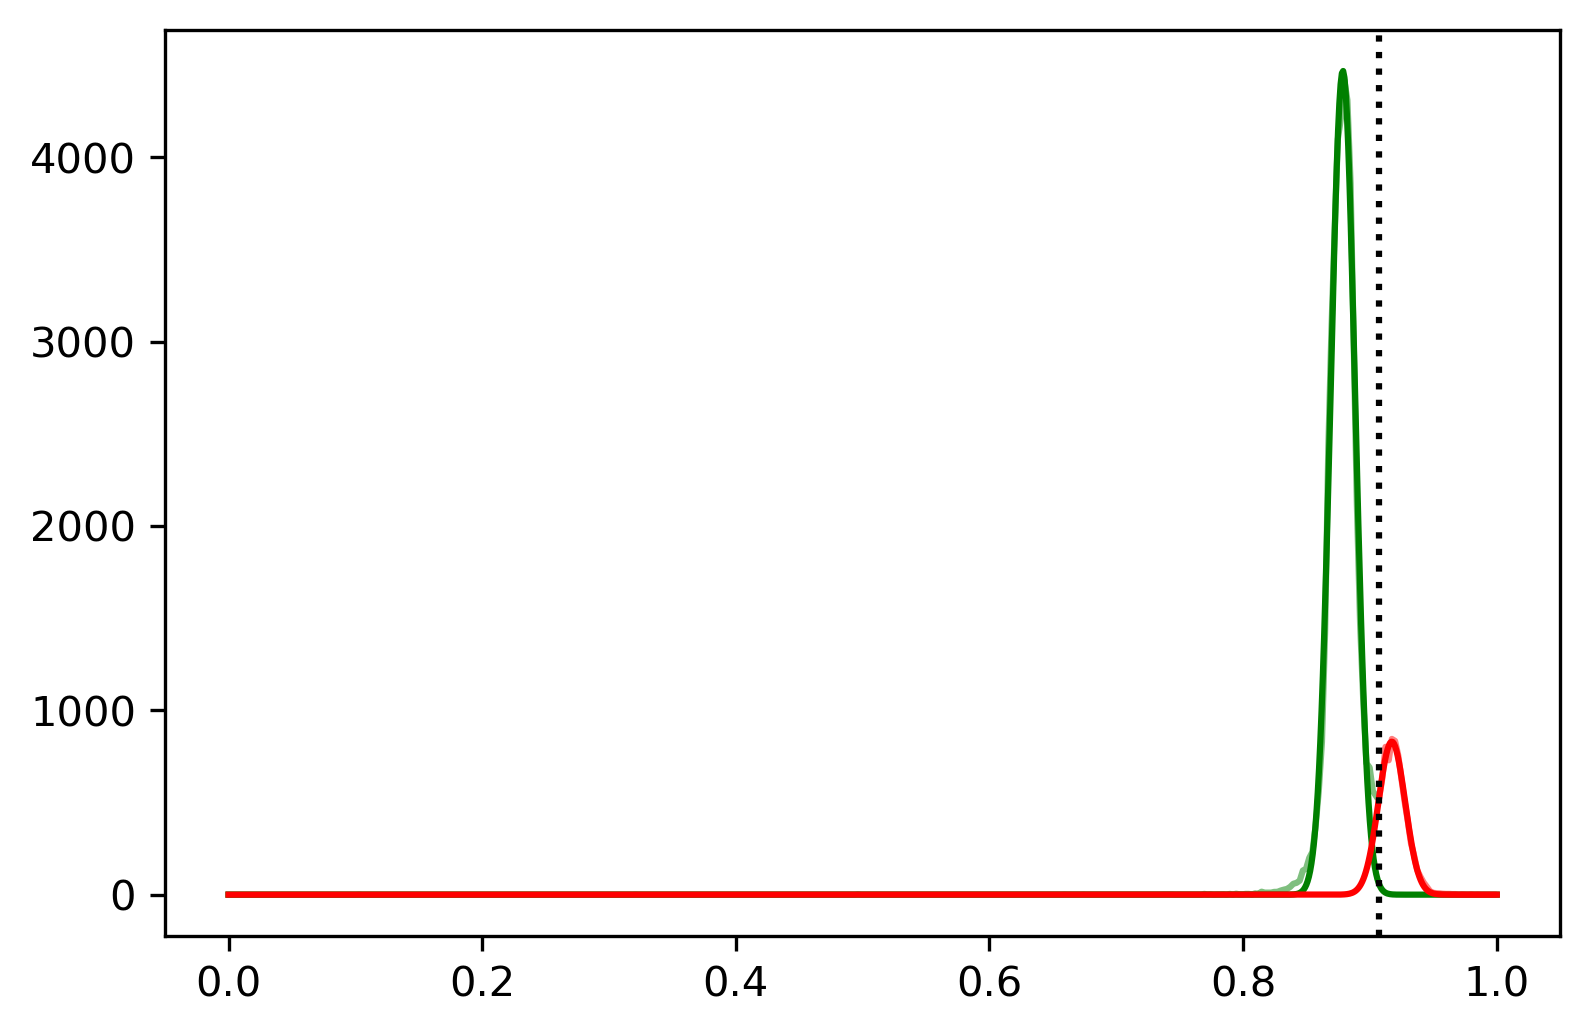

In [150]:
thresh_test = 11

counts, binsss, p = plt.hist(t_tail[np.argwhere(thresh==thresh_test)[:,0][0]]/t_tot[np.argwhere(thresh==thresh_test)[:,0][0]], 
                             bins=np.linspace(0, 1, 400))
plt.close()

#dh = savgol_filter(counts, 3, 0)
dh = counts

peaks, proms = find_peaks(dh, prominence=2)
first = peaks[np.argwhere(proms['prominences']==np.sort(proms['prominences'])[-1])[0,0]]
second = peaks[np.argwhere(proms['prominences']==np.sort(proms['prominences'])[-2])[0,0]]

dip = np.argmin(dh[first:second])+first

fit_gamma, cov_g = curve_fit(gauss_new, binsss[:dip], counts[:dip])
fit_neutron, cov_n = curve_fit(gauss_new, binsss[dip:-1], counts[dip:])

fom = np.abs(fit_gamma[1]-fit_neutron[1])/(2*np.sqrt(np.log(2)*2)*(np.abs(fit_gamma[2])+np.abs(fit_neutron[2])))

print('Calculated FOM: {}'.format(fom))

x = np.linspace(0,1,1000)
plt.plot(x, gauss_new(x, *fit_gamma), color='green')
plt.plot(binsss[:dip], counts[:dip], color='green', alpha=0.5)

plt.plot(x, gauss_new(x, *fit_neutron), color='red')
plt.plot(binsss[dip:-1], counts[dip:], color='red', alpha=0.5)
#plt.axvline(first, color='red')
#plt.axvline(second, color='red')
plt.axvline(binsss[dip], color='black', linestyle=':')

plt.show()

In [138]:
fom = np.abs(fit_gamma[1]-fit_neutron[1])/(2*np.sqrt(np.log(2)*2)*(fit_gamma[2]+fit_neutron[2]))

NameError: name 'fomnp' is not defined

In [133]:
fit_gamma[2]

0.015811832593718766

In [135]:
fit_gamma[1]

0.33650611926094914

In [134]:
2*np.sqrt(np.log(2)*2)*fit_gamma[2]

0.03723402034036266

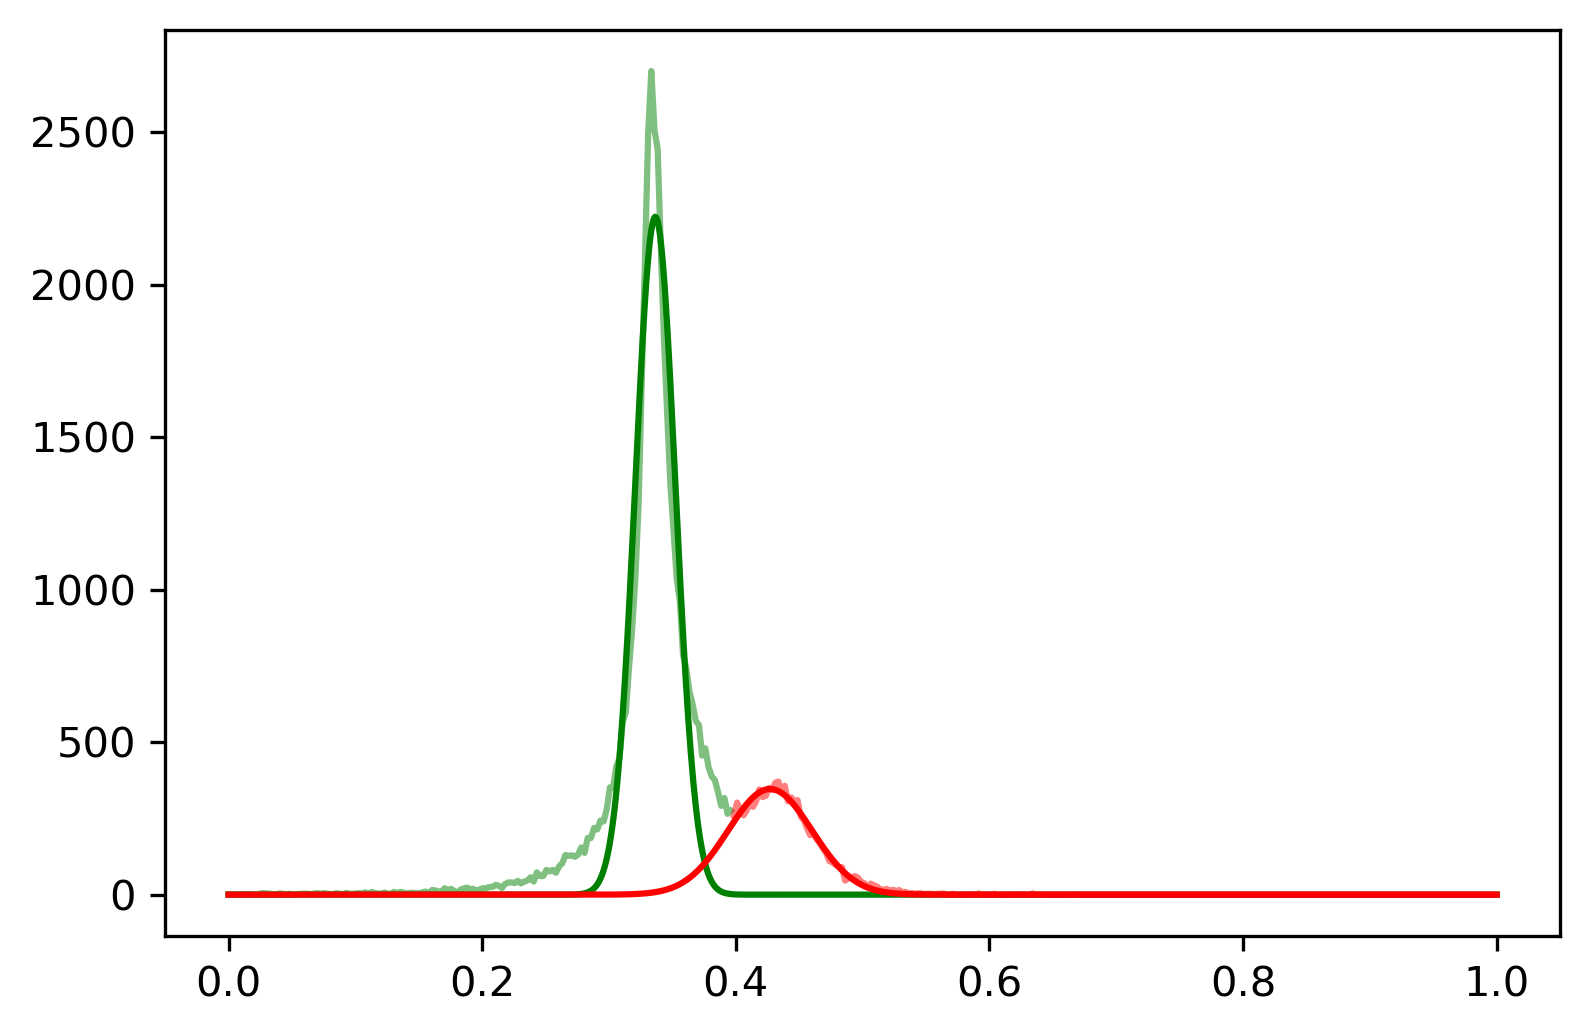

In [125]:
fit_gamma, cov_g = curve_fit(gauss_new, binsss[:dip], counts[:dip])
fit_neutron, cov_n = curve_fit(gauss_new, binsss[dip:-1], counts[dip:])

x = np.linspace(0,1,1000)
plt.plot(x, gauss_new(x, *fit_gamma), color='green')
plt.plot(binsss[:dip], counts[:dip], color='green', alpha=0.5)

plt.plot(x, gauss_new(x, *fit_neutron), color='red')
plt.plot(binsss[dip:-1], counts[dip:], color='red', alpha=0.5)

plt.show()

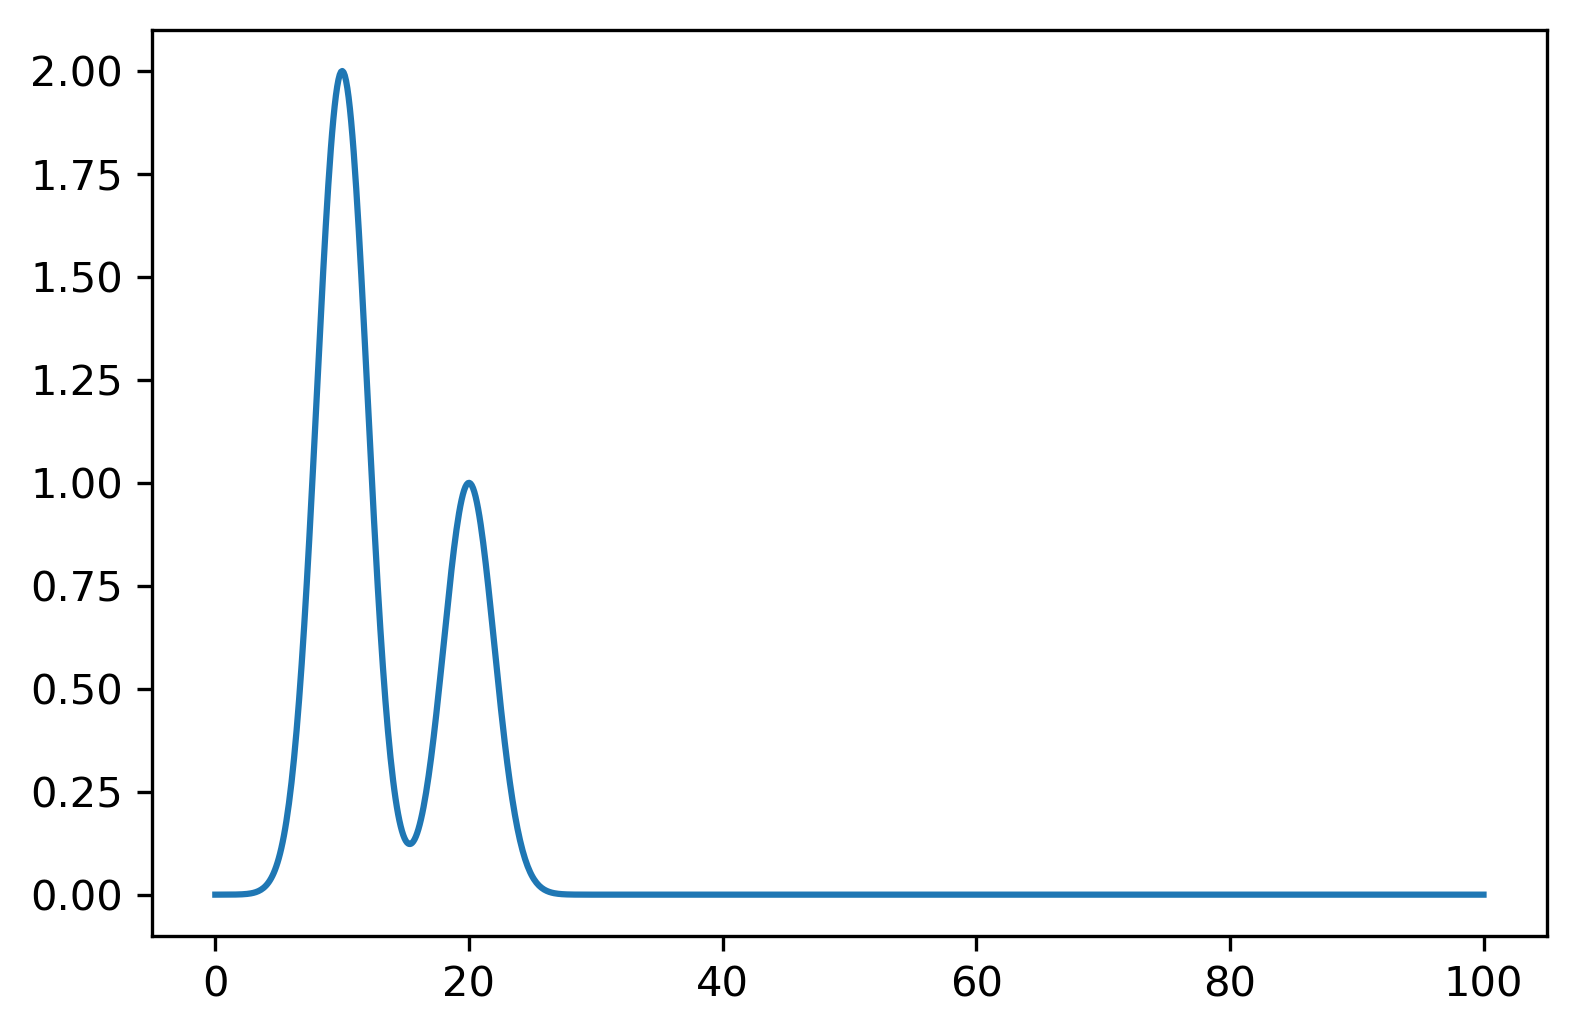

In [159]:
plt.plot(x, double_gauss(x, 2, 10, 2, 1, 20, 2))

In [187]:
s

<function NE204_Functions.s(signal, start_rise, tau, peaking_time, gap_time, w=0)>

In [ ]:
s(data_cf[])

In [48]:
test_energies_cf = calibrate_pulses(data_cf, peak=10, gap=20, tau=65, calibrated=False, svw=3, use_CFD=True, shift=20, samp_size=50)

Creating spectra:   0%|          | 0/52302 [00:00<?, ?it/s]

Index 2597 failed to fit or create trapezoid
Index 4328 failed to fit or create trapezoid
Index 5631 failed to fit or create trapezoid
Index 6585 failed to fit or create trapezoid
Index 8343 failed to fit or create trapezoid
Index 9591 failed to fit or create trapezoid
Index 9675 failed to fit or create trapezoid
Index 13404 failed to fit or create trapezoid
Index 16509 failed to fit or create trapezoid
Index 21454 failed to fit or create trapezoid
Index 21827 failed to fit or create trapezoid
Index 22987 failed to fit or create trapezoid
Index 34537 failed to fit or create trapezoid
Index 36594 failed to fit or create trapezoid
Index 41057 failed to fit or create trapezoid
Index 44282 failed to fit or create trapezoid
Index 45600 failed to fit or create trapezoid
Index 45769 failed to fit or create trapezoid
Index 46443 failed to fit or create trapezoid
Index 47912 failed to fit or create trapezoid
Index 49063 failed to fit or create trapezoid
Index 49737 failed to fit or create trape

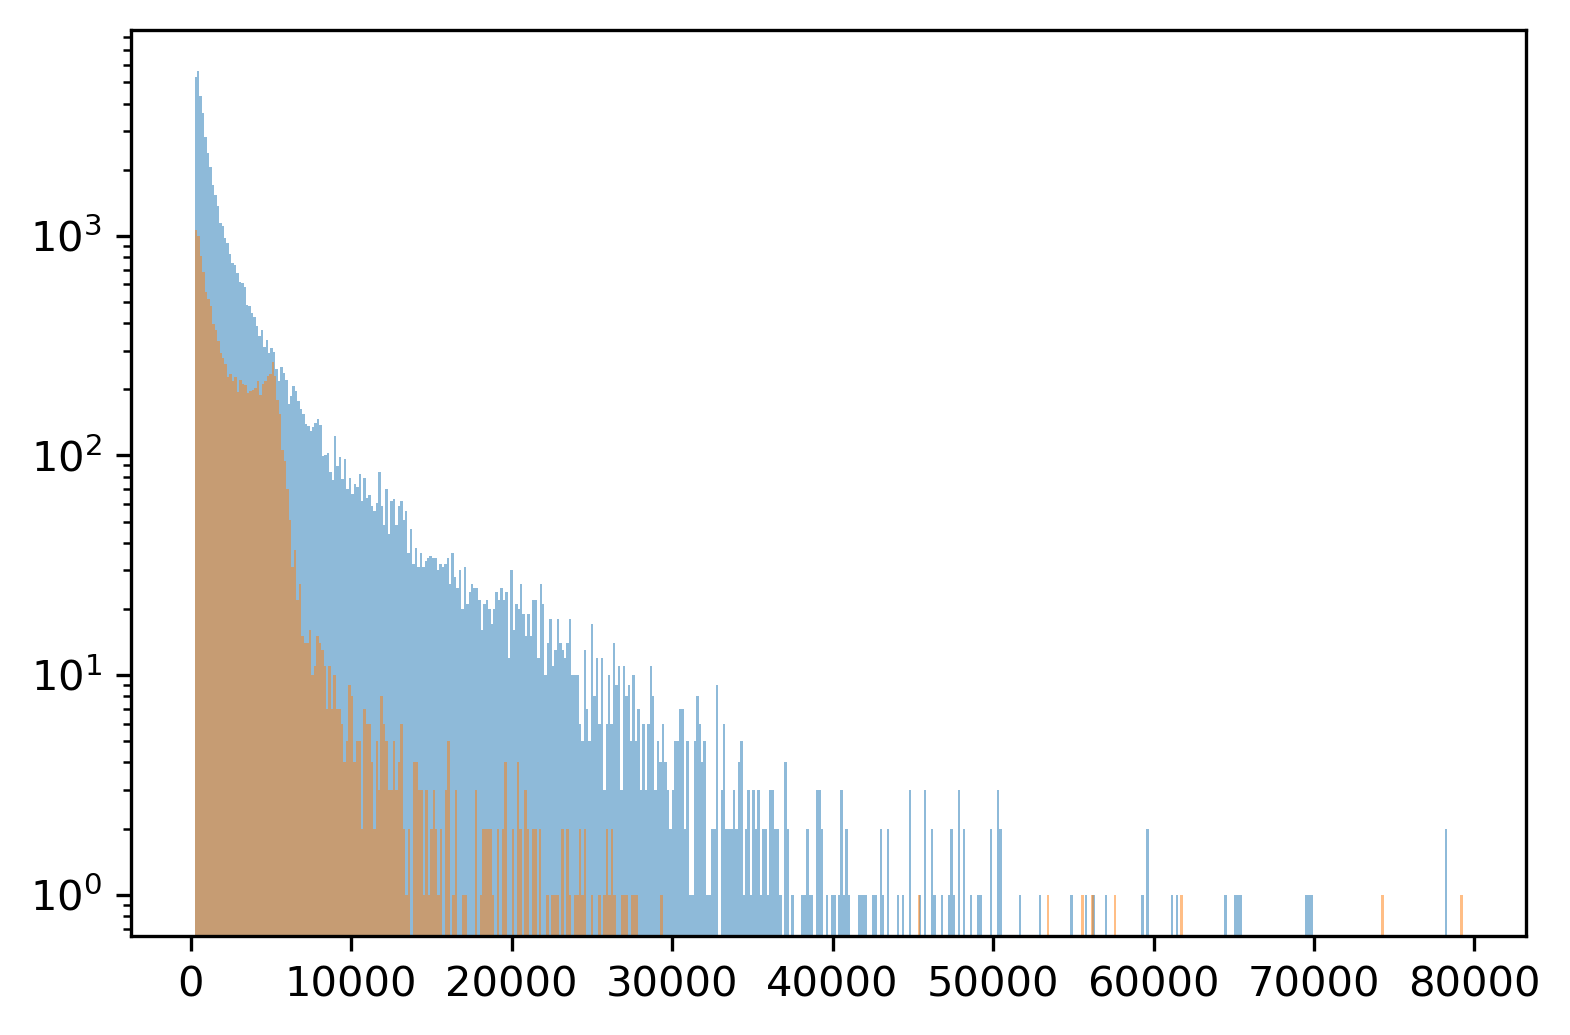

In [49]:
plt.hist(test_energies_cf[test_energies_cf < 80000], bins=2**9, alpha=0.5)
plt.hist(test_energies_new[test_energies_new < 80000], bins=2**9, alpha=0.5)
plt.semilogy()
plt.show()

In [215]:
data, sat = import_data('Data/Combined_Data/EJ-301-Test-Cs137-3_close.h5')

In [216]:
max_ = 300
pileup = np.argwhere(np.argmax(data, axis=1)>100)[:,0]
totals, tails = [], []
enes, ths = [], []
for i in tqdm(range(len(data)), leave=False):
    if i not in pileup and i not in sat:
        sig = savgol_filter(data[i], 3, 0)
        min_ = CFD(data[i][:120], 0.1, samp_size=50, shift=20)
        trap = s(sig, min_-5, tau=65, peaking_time=10, gap_time=20)
        enes.append(max(trap))
        ths.append(max(sig))
        temp = quick_psd(data[i], 21, min_-3, max_)
        tails.append(temp[0])
        totals.append(temp[1])
totals = np.array(totals)
tails = np.array(tails)
enes = np.array(enes)
ths = np.array(ths)

ttt = tails/totals

  0%|          | 0/12561 [00:00<?, ?it/s]

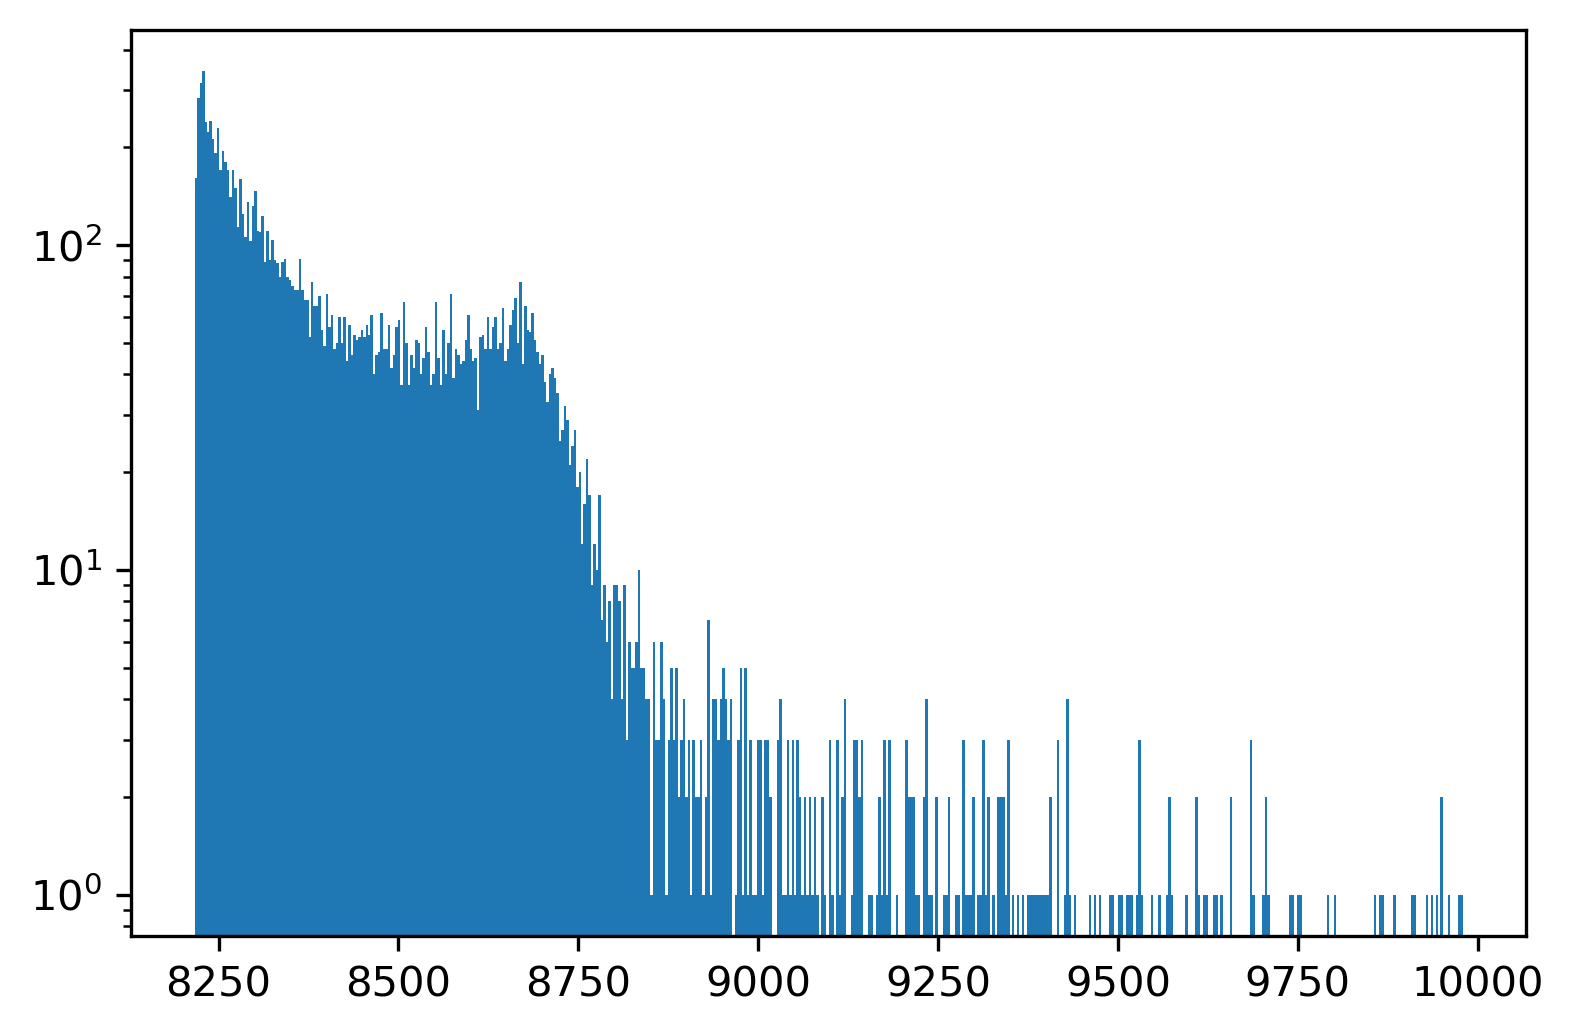

In [223]:
plt.hist(np.where(ths<10000, ths, np.nan), bins=2**9)
plt.semilogy()
plt.show()

In [180]:
from matplotlib.colors import LogNorm

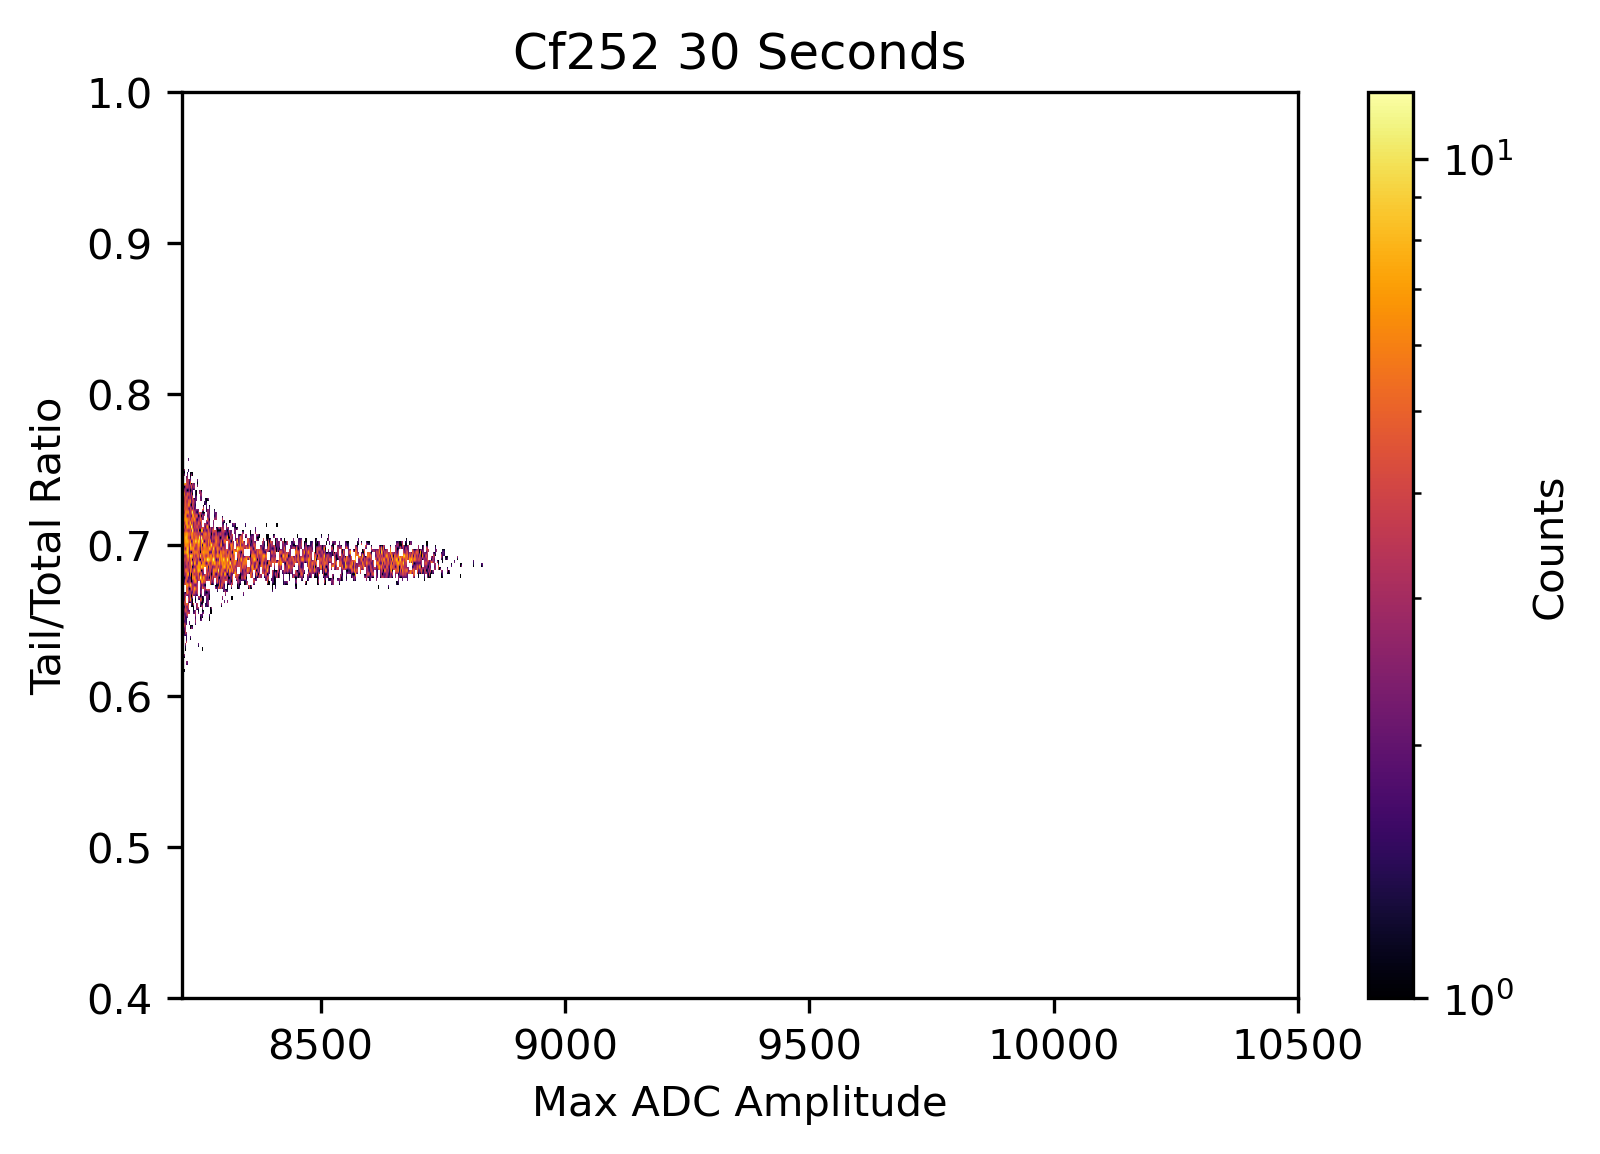

In [217]:
#x_bins = np.linspace(0,3e4,1000)
x_bins = np.linspace(min(ths),10500,1000)
y_bins = np.linspace(0.4,1,250)

psd_image = np.histogram2d(ttt, ths, bins=[y_bins, x_bins])[0]
#plt.figure(figsize=[10,10])
plt.imshow(np.flipud(np.where(psd_image>0, psd_image, np.nan)), aspect='auto', cmap='inferno',
          extent=(min(ths),10500,0.4,1), norm=LogNorm(vmin=1, vmax=np.max(psd_image)))
plt.ylabel('Tail/Total Ratio')
plt.xlabel('Max ADC Amplitude')
plt.title('Cf252 30 Seconds')
cbar = plt.colorbar(label='Counts')
plt.savefig('Plots/PSD-Cs137_maxheight.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

In [191]:
np.linspace(0,3e4,10000)

array([0.00000000e+00, 3.00030003e+00, 6.00060006e+00, ...,
       2.99939994e+04, 2.99969997e+04, 3.00000000e+04])

(0.0, 80000.0)

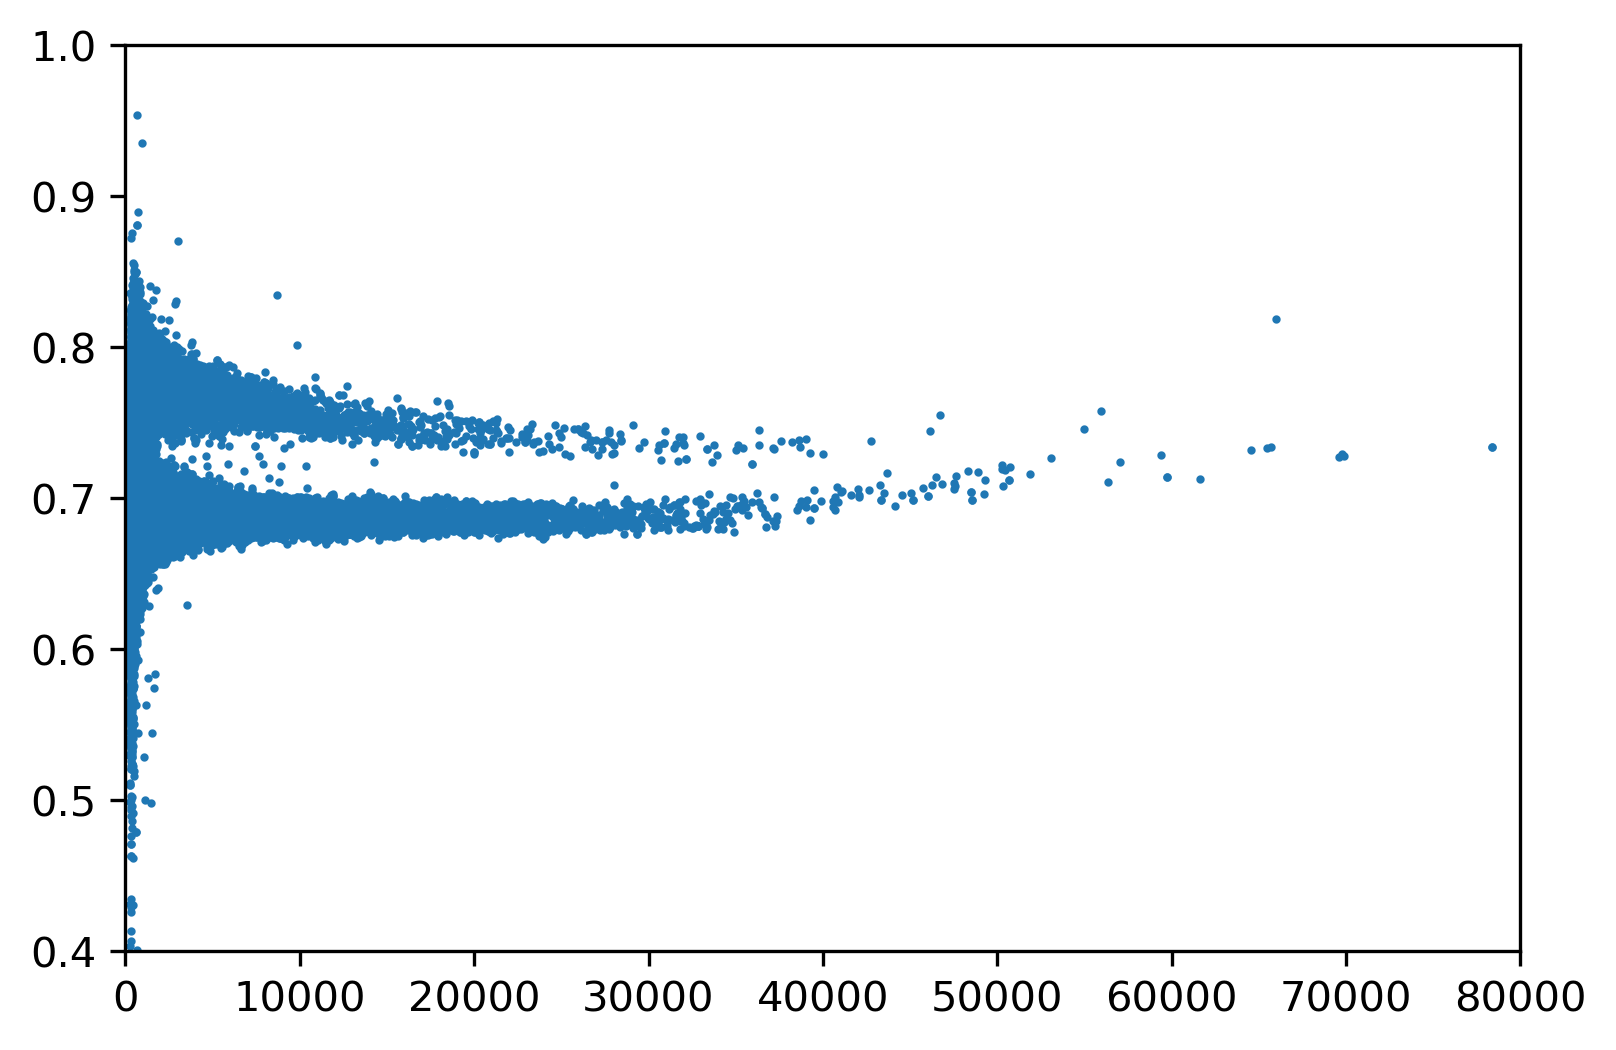

In [67]:
plt.scatter(enes, ttt, s=1)
plt.ylim(0.4,1)
plt.xlim(0,8e4)

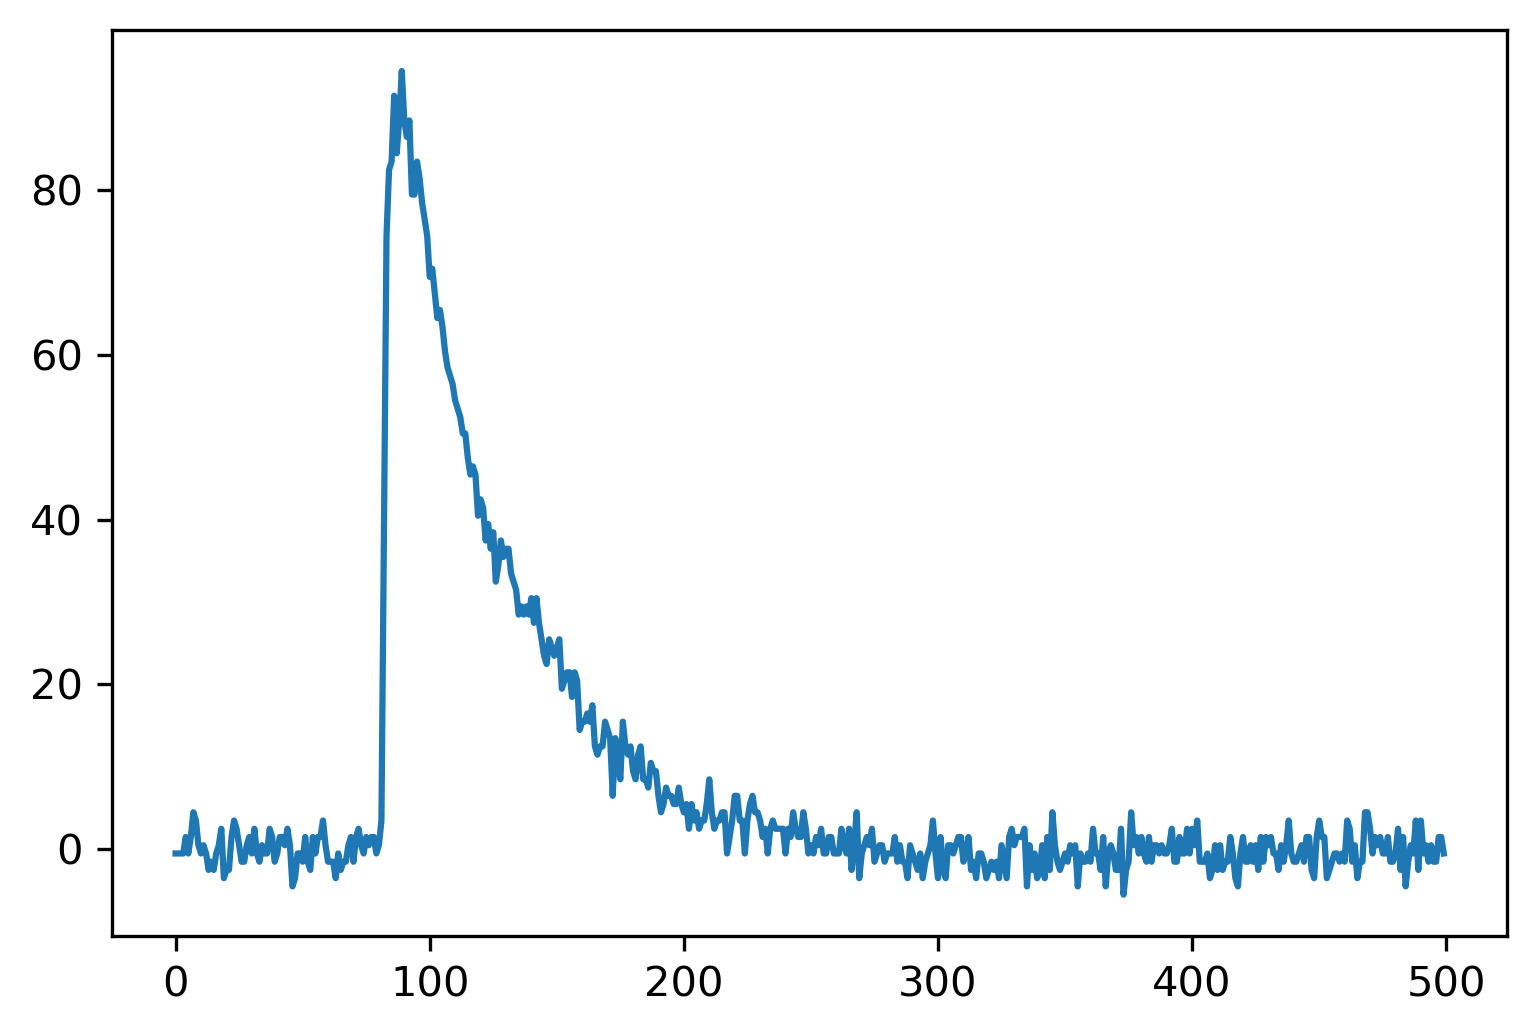

In [171]:
plt.plot(reset_zero(data_cf[0], samp_size=50))

In [ ]:
np.linspace(0, 200000, 100)

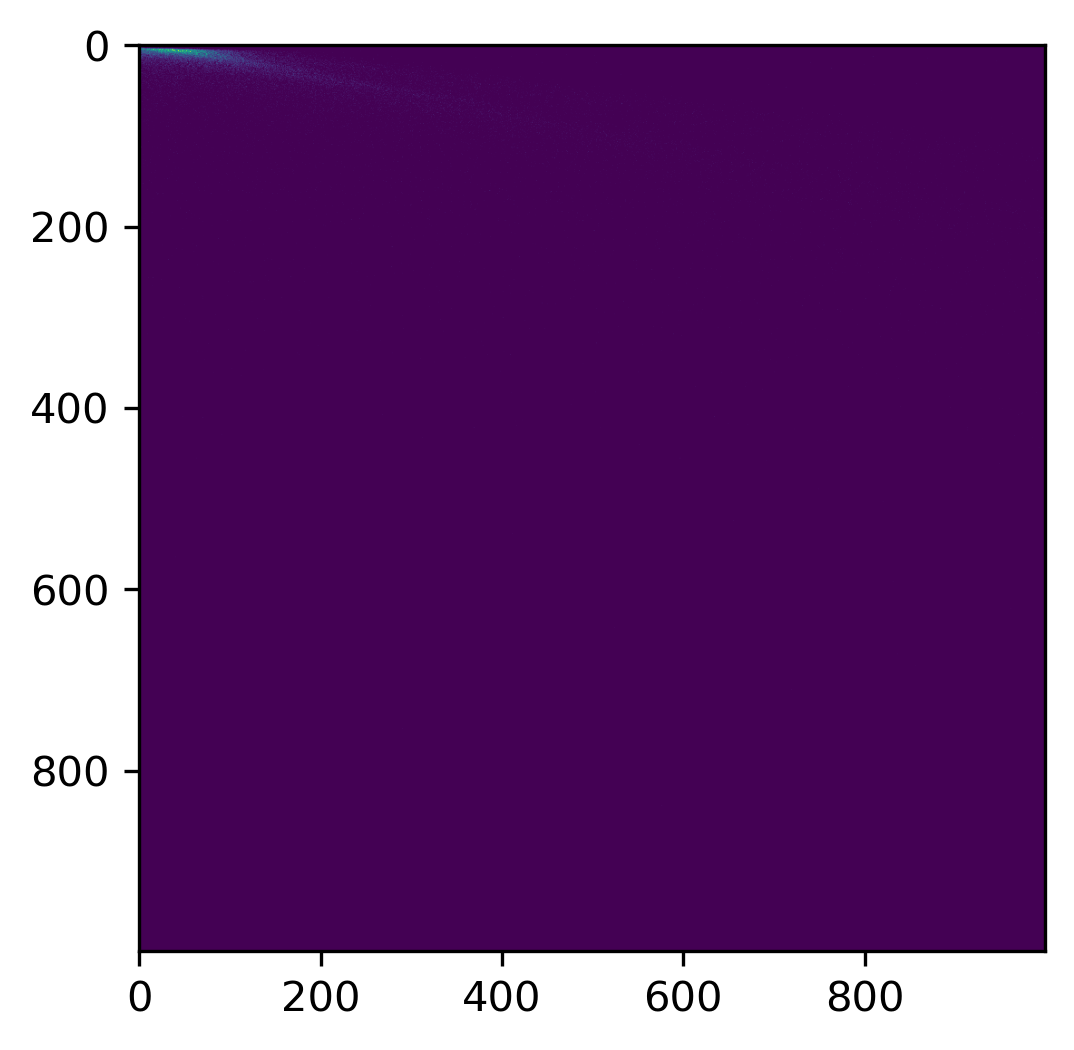

In [49]:
plt.imshow(np.histogram2d(totals, tails, bins=[np.linspace(0, 200000, 1000), np.linspace(0, 2000, 1000)])[0])

In [42]:
np.histogram2d?

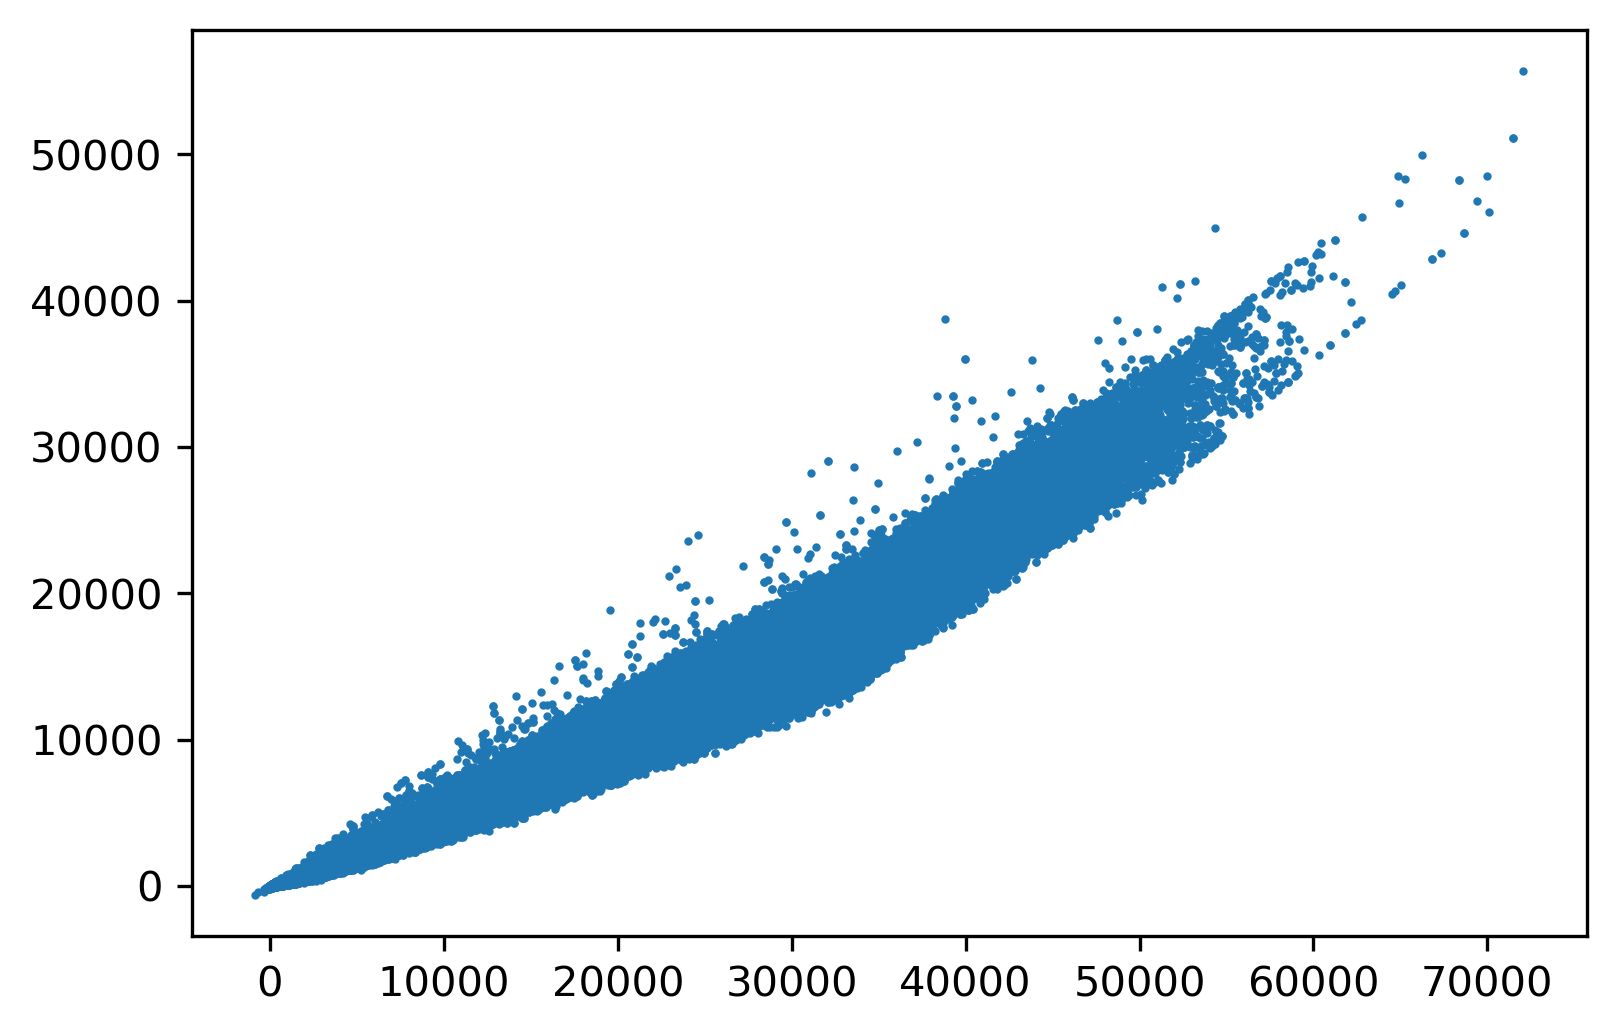

In [63]:
plt.scatter(totals, tails, s=1)

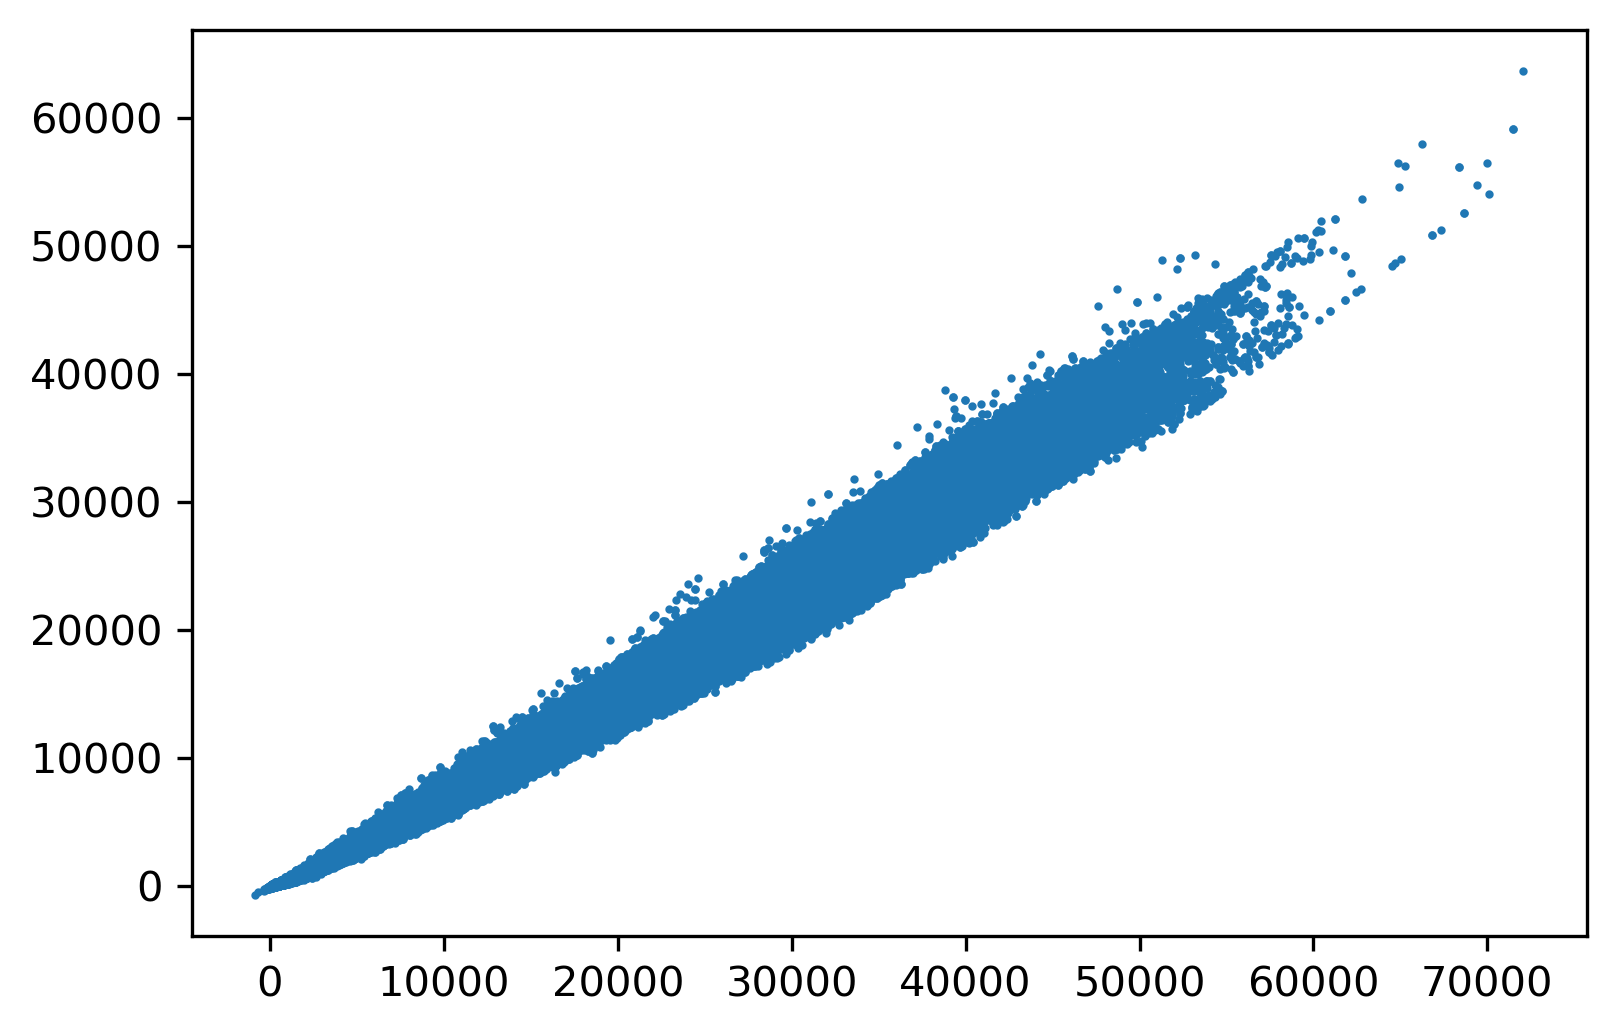

In [65]:
plt.scatter(totals, tails, s=1)

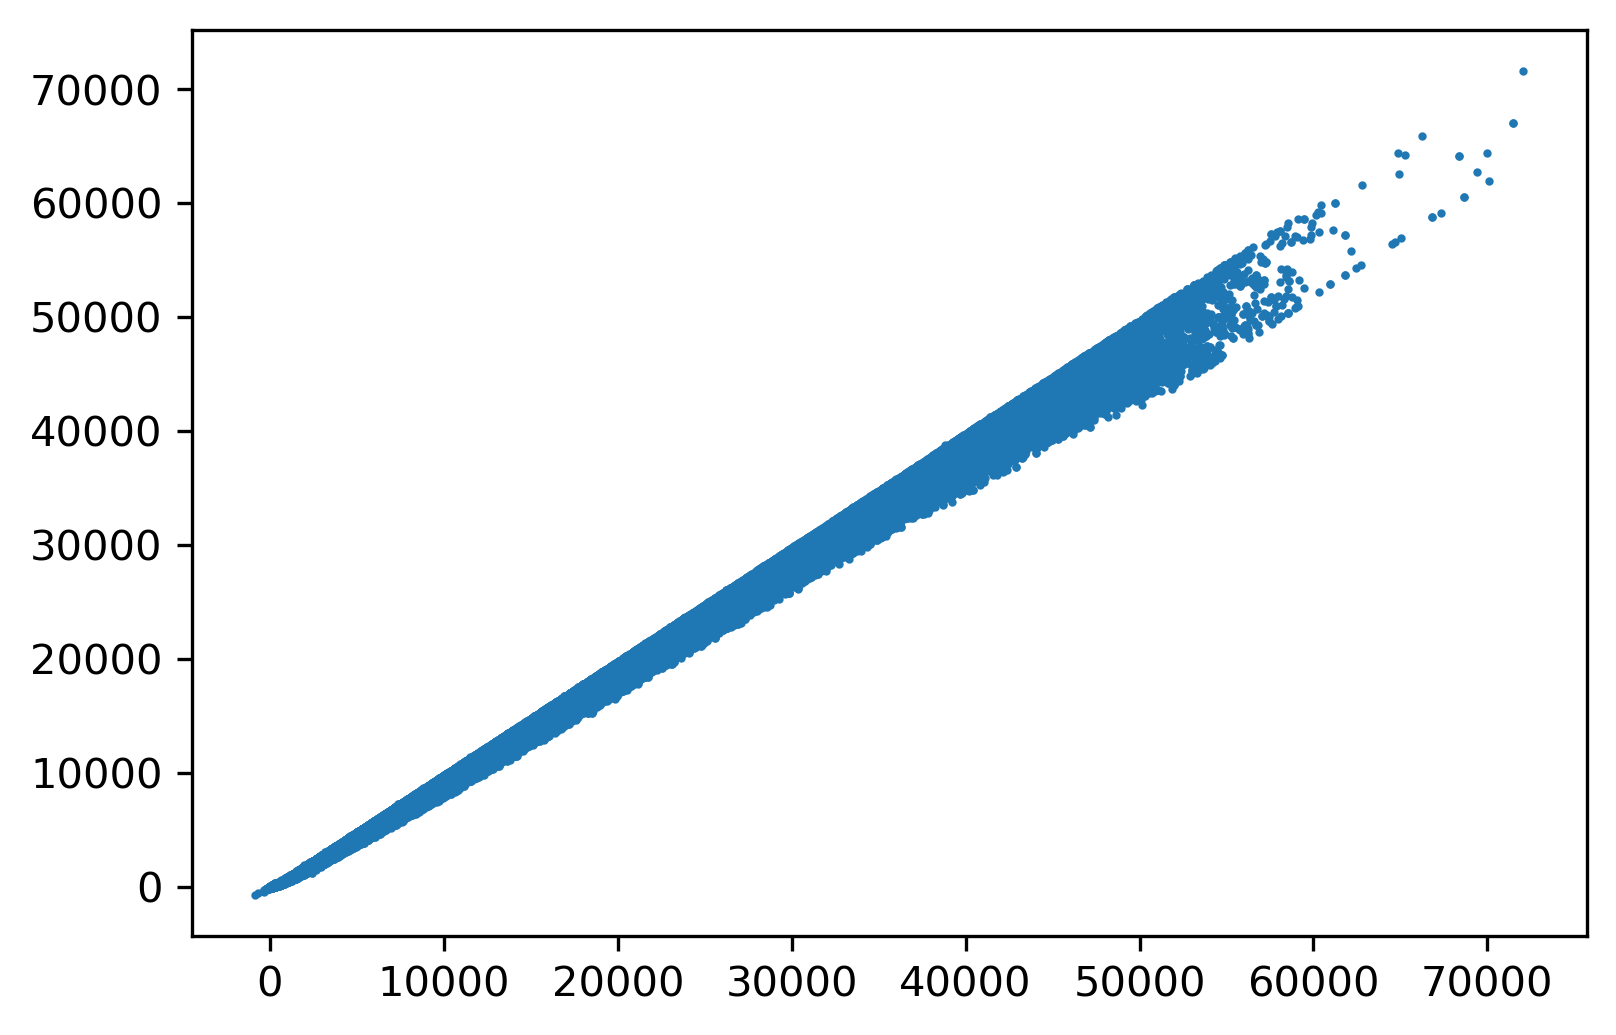

In [67]:
plt.scatter(totals, tails, s=1)

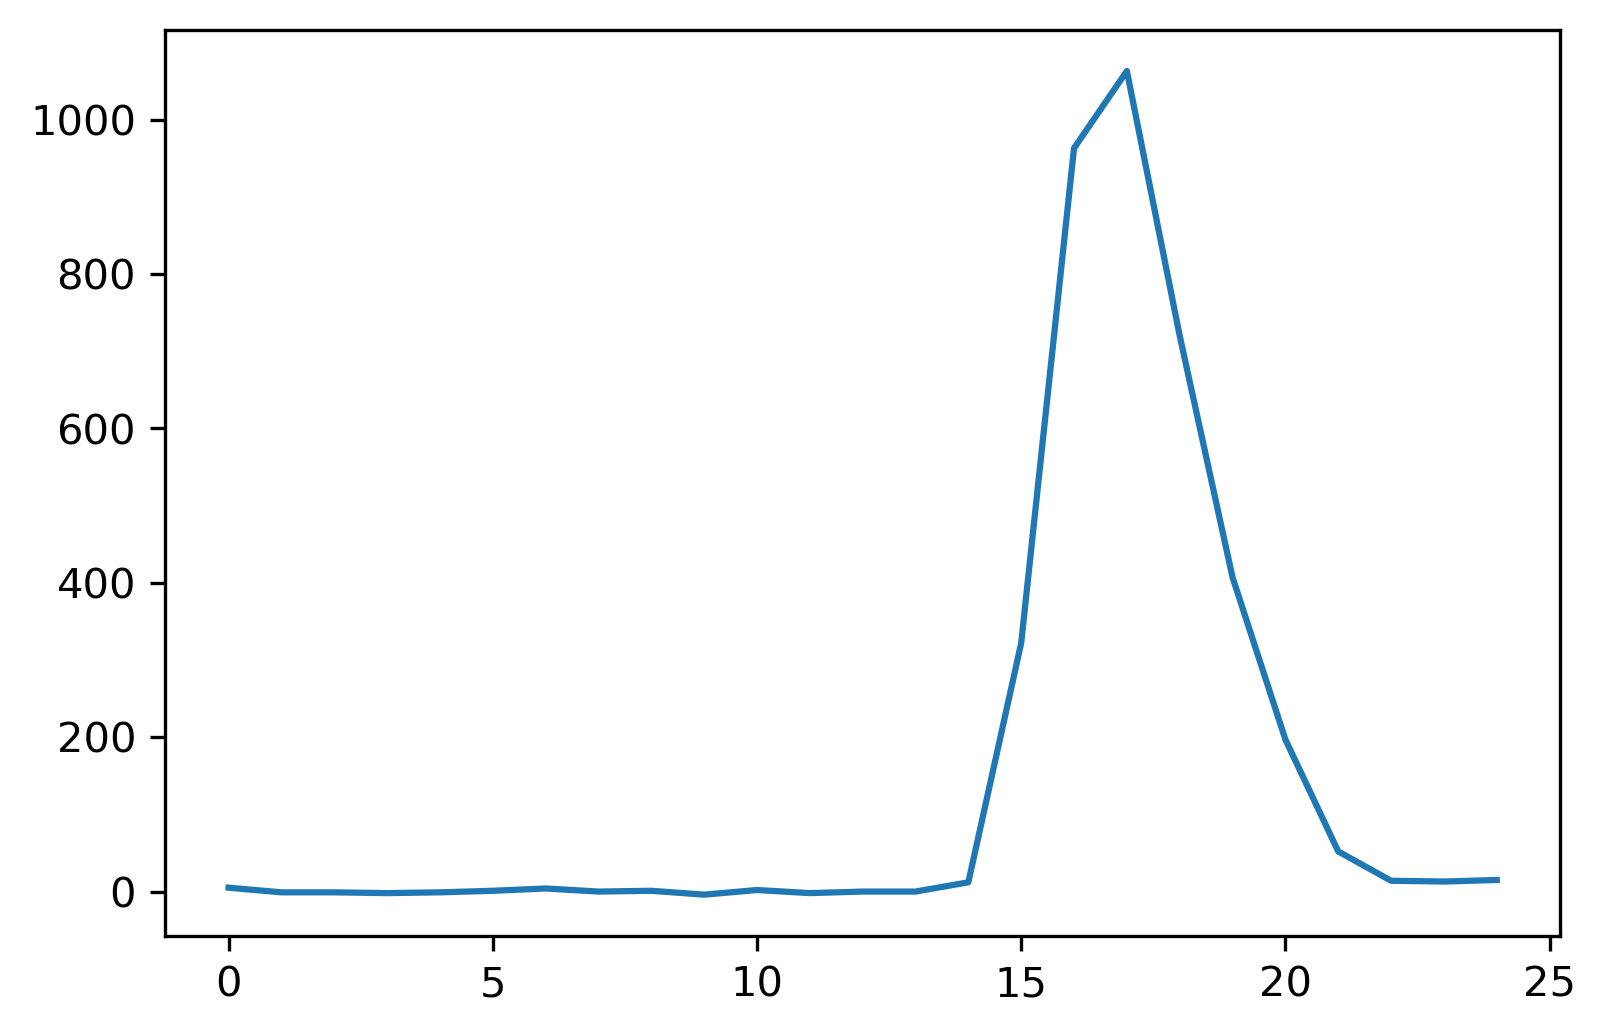

In [47]:
plt.plot(reset_zero(data[1][min_-10:max_], samp_size=5))

In [32]:
CFD

<function NE204_Functions.CFD(signal, frac, shift=500, pf=False, samp_size=500, save_name=None)>

In [ ]:
reset_zero(data[1][min_-10:max_], samp_size=5)